# Import Libraries and Data


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

!pip install kneed
from kneed import KneeLocator

In [ ]:
# Import Data
link = 'https://drive.google.com/file/d/13w4IMiZuOa5oQN-U3z0lg-cqRZKVdnDh/view?usp=sharing'
df = pd.read_csv('https://drive.google.com/uc?export=download&id=' + link.split('/')[-2] )

In [ ]:
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


# Data preprocessing

In [ ]:
# Select data
df = df[df['Year'] == 2024]

In [ ]:
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
9,1,Company_1,Retail,Latin America,2024,687.0,4.6,460.1,7.9,58.5,68.9,29.9,76.8,49289.1,24644.5,98578.1
20,2,Company_2,Retail,Asia,2024,3822.9,-1.2,5807.8,3.6,65.7,65.4,63.0,68.7,283660.0,141830.0,567320.0
31,3,Company_3,Transportation,Latin America,2024,438.0,10.3,739.4,5.5,32.1,23.4,41.5,31.5,272361.8,45393.6,907872.8
42,4,Company_4,Technology,Africa,2024,6555.1,26.0,45451.6,12.2,63.5,100.0,64.8,25.6,163877.9,98326.7,327755.8
53,5,Company_5,Finance,Middle East,2024,3282.1,22.5,9663.0,0.0,47.4,80.4,19.9,41.8,41818.8,20909.4,104546.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,996,Company_996,Healthcare,Europe,2024,5915.9,24.4,30318.1,8.9,60.1,88.5,33.8,58.1,343417.5,343417.5,686834.9
10965,997,Company_997,Utilities,Africa,2024,634.7,11.5,733.2,1.8,66.1,51.0,88.9,58.3,427979.2,267487.0,4279792.1
10976,998,Company_998,Healthcare,Oceania,2024,1838.2,30.5,13081.9,3.5,66.5,100.0,32.3,67.1,91910.8,91910.8,183821.5
10987,999,Company_999,Finance,Asia,2024,5464.8,21.5,9851.2,5.5,53.6,98.3,17.7,45.0,55977.4,27988.7,139943.5


In [ ]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 9 to 10998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          1000 non-null   int64  
 1   CompanyName        1000 non-null   object 
 2   Industry           1000 non-null   object 
 3   Region             1000 non-null   object 
 4   Year               1000 non-null   int64  
 5   Revenue            1000 non-null   float64
 6   ProfitMargin       1000 non-null   float64
 7   MarketCap          1000 non-null   float64
 8   GrowthRate         1000 non-null   float64
 9   ESG_Overall        1000 non-null   float64
 10  ESG_Environmental  1000 non-null   float64
 11  ESG_Social         1000 non-null   float64
 12  ESG_Governance     1000 non-null   float64
 13  CarbonEmissions    1000 non-null   float64
 14  WaterUsage         1000 non-null   float64
 15  EnergyConsumption  1000 non-null   float64
dtypes: float64(11), int64(2), ob

In [ ]:
# Check duplicated values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check missing values
df.isna().sum()

,0
CompanyID,0
CompanyName,0
Industry,0
Region,0
Year,0
Revenue,0
ProfitMargin,0
MarketCap,0
GrowthRate,0
ESG_Overall,0


# EDA

## Univariate analysis

In [ ]:
# Descriptive
display(df.describe())
display(df.describe(include='object'))

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,2024.0,6063.939900,10.953200,18874.133700,5.139100,57.176700,60.10560,57.75920,53.671400,1.606672e+06,6.942949e+05,1.468879e+07
std,288.819436,0.0,13353.933779,10.019794,58072.168482,9.331598,15.721227,26.13136,23.44997,25.436877,7.220099e+06,2.209991e+06,7.249166e+07
min,1.000000,2024.0,42.500000,-20.000000,2.000000,-33.900000,12.700000,2.20000,0.00000,0.000000,2.291500e+03,1.145800e+03,5.728800e+03
25%,250.750000,2024.0,1072.575000,4.400000,1280.075000,-0.300000,47.100000,38.90000,40.10000,32.500000,1.402186e+05,7.949205e+04,3.880880e+05
50%,500.500000,2024.0,2327.100000,10.400000,3982.650000,5.200000,57.500000,60.20000,57.90000,54.450000,3.345778e+05,2.428195e+05,1.445954e+06
75%,750.250000,2024.0,5774.800000,16.900000,12654.725000,10.900000,68.100000,82.82500,76.00000,74.850000,8.422876e+05,6.184806e+05,6.019102e+06
max,1000.000000,2024.0,154868.900000,50.000000,865271.700000,36.100000,98.300000,100.00000,100.00000,100.000000,1.569603e+08,4.708809e+07,1.569603e+09


,CompanyName,Industry,Region
count,1000,1000,1000
unique,1000,9,7
top,Company_1000,Healthcare,Asia
freq,1,121,152


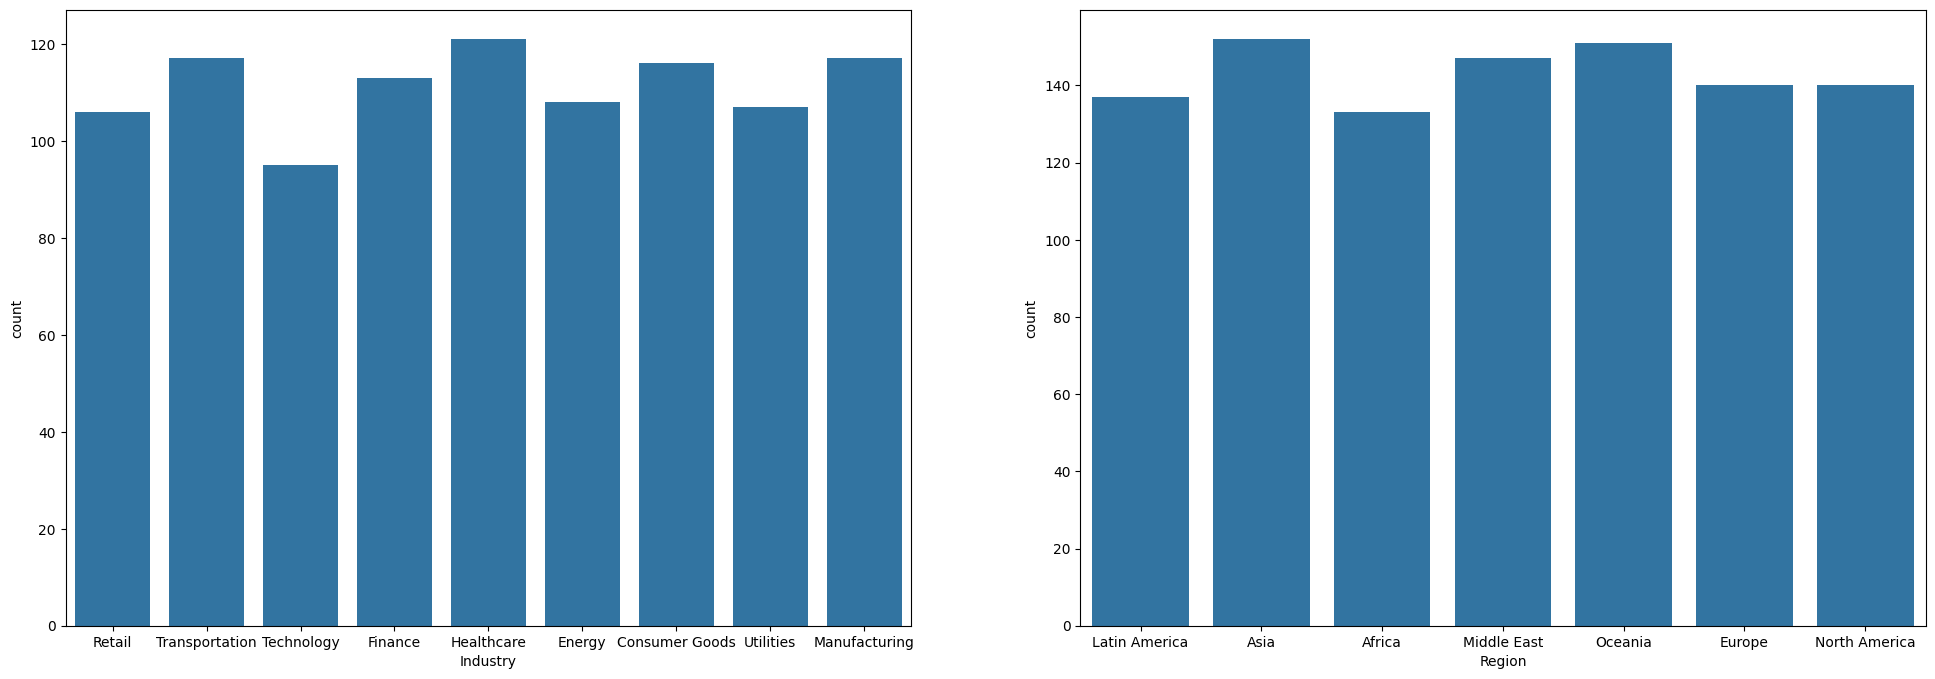

In [ ]:
# Countplot of Industry and Region col
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
sns.countplot(data=df, x='Industry', ax=ax[0])
sns.countplot(data=df, x='Region', ax=ax[1])
plt.show()

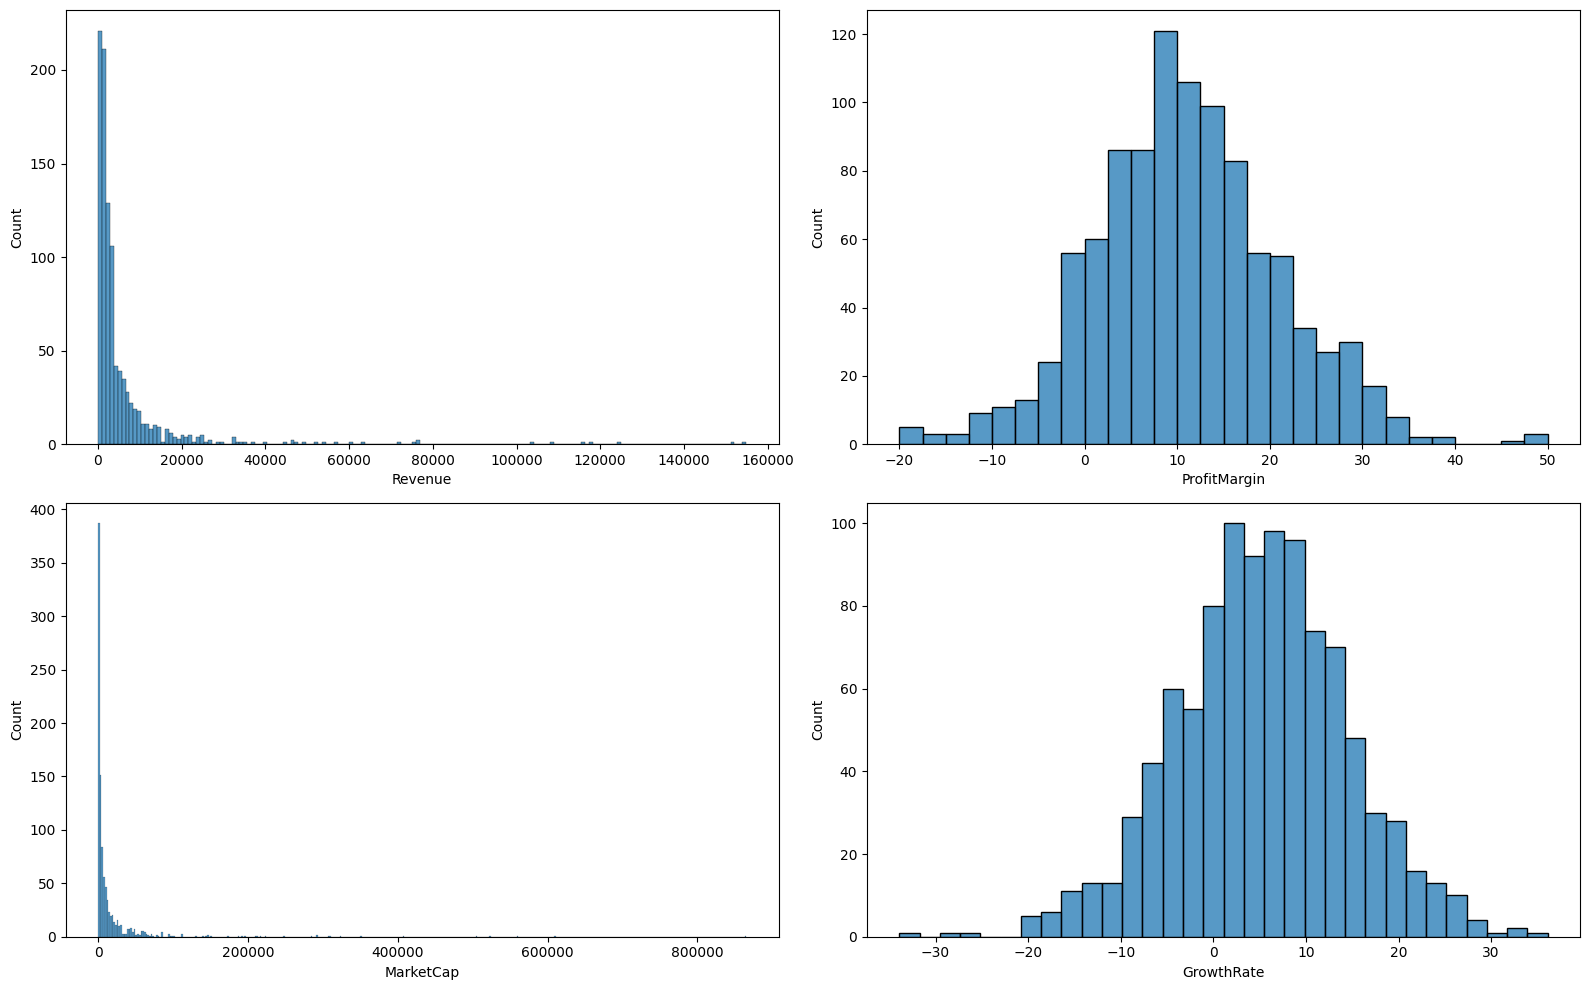

In [ ]:
# Distribution of Revenue, ProfitMargin, Marketcap and GrowthRate cols
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.histplot(data=df, x='Revenue', ax=ax[0, 0])
sns.histplot(data=df, x='ProfitMargin', ax=ax[0, 1])
sns.histplot(data=df, x='MarketCap', ax=ax[1, 0])
sns.histplot(data=df, x='GrowthRate', ax=ax[1, 1])
plt.tight_layout()
plt.show()

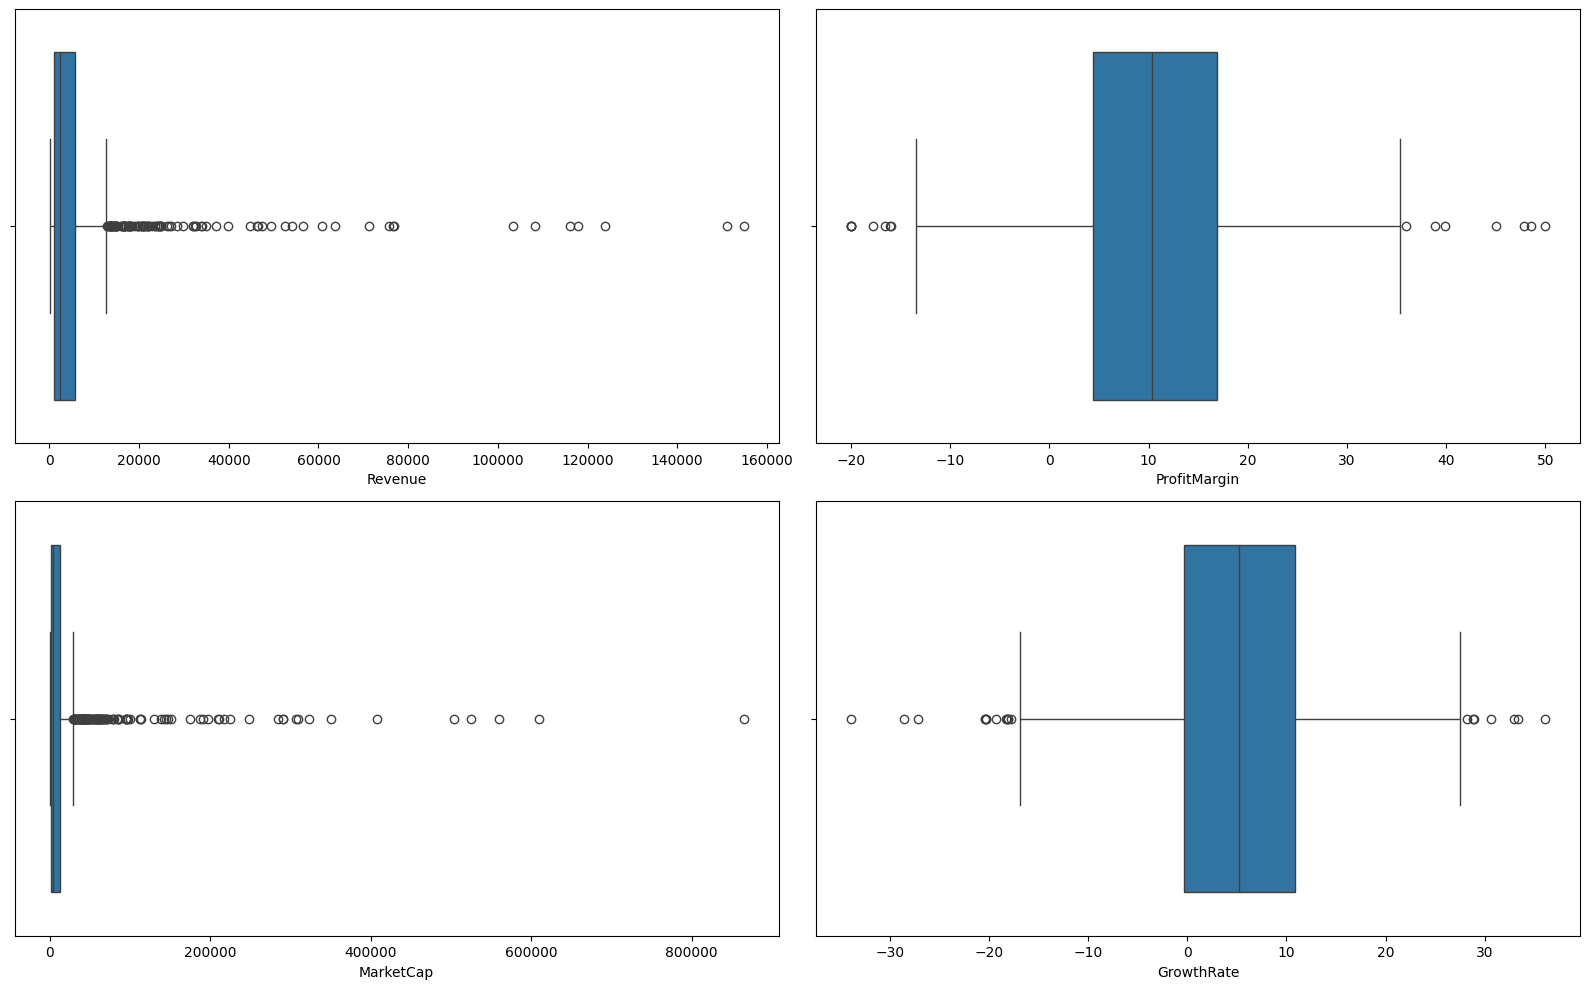

In [ ]:
# Box plot of Revenue, ProfitMargin, Marketcap and GrowthRate cols
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.boxplot(data=df, x='Revenue', ax=ax[0, 0])
sns.boxplot(data=df, x='ProfitMargin', ax=ax[0, 1])
sns.boxplot(data=df, x='MarketCap', ax=ax[1, 0])
sns.boxplot(data=df, x='GrowthRate', ax=ax[1, 1])
plt.tight_layout()
plt.show()

Cac cot numeric co kha nhieu outliers, day la du lieu cua cty va cung co the noi len dac diem cua cty nen kha bo ich khi phan cum du lieu. Vi vay ko xu ly cac cot outliers

In [ ]:
df['Revenue_log'] = np.log1p(df['Revenue'])
df['MarketCap_log'] = np.log1p(df['MarketCap'])

/tmp/ipython-input-328731099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue_log'] = np.log1p(df['Revenue'])
/tmp/ipython-input-328731099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MarketCap_log'] = np.log1p(df['MarketCap'])


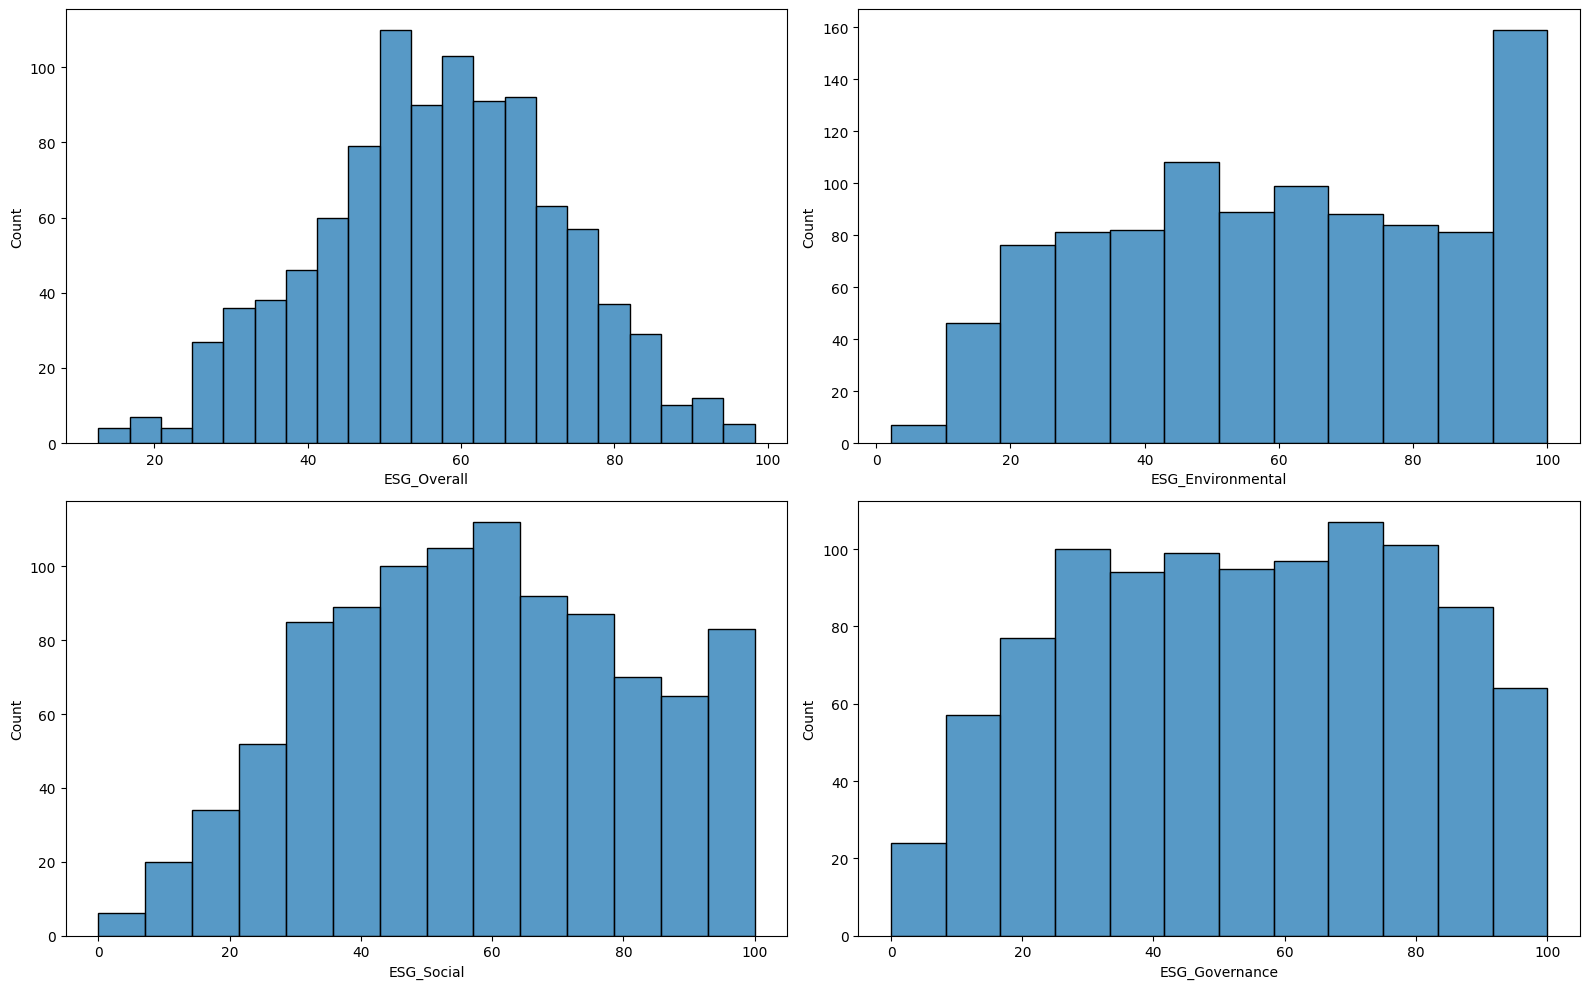

In [ ]:
# Distribution of ESG_Overall, ESG_Environmental, ESG_Social and ESG_Governance cols
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.histplot(data=df, x='ESG_Overall', ax=ax[0, 0])
sns.histplot(data=df, x='ESG_Environmental', ax=ax[0, 1])
sns.histplot(data=df, x='ESG_Social', ax=ax[1, 0])
sns.histplot(data=df, x='ESG_Governance', ax=ax[1, 1])
plt.tight_layout()
plt.show()

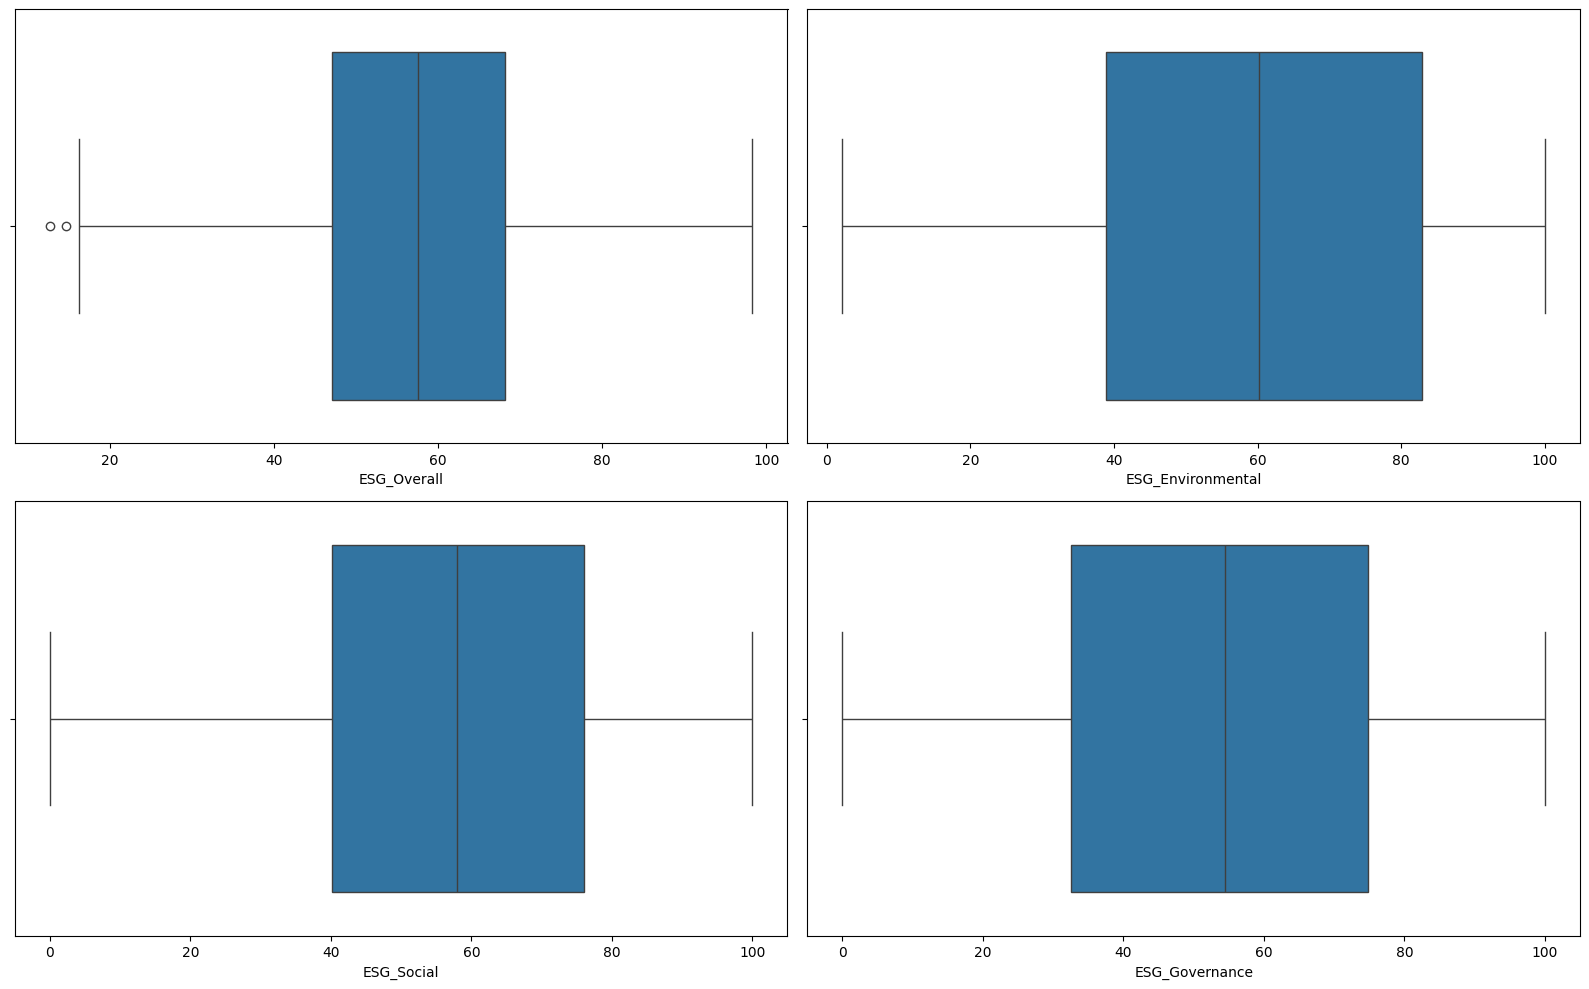

In [ ]:
# Box plot of ESG_Overall, ESG_Environmental, ESG_Social and ESG_Governance cols
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.boxplot(data=df, x='ESG_Overall', ax=ax[0, 0])
sns.boxplot(data=df, x='ESG_Environmental', ax=ax[0, 1])
sns.boxplot(data=df, x='ESG_Social', ax=ax[1, 0])
sns.boxplot(data=df, x='ESG_Governance', ax=ax[1, 1])
plt.tight_layout()
plt.show()

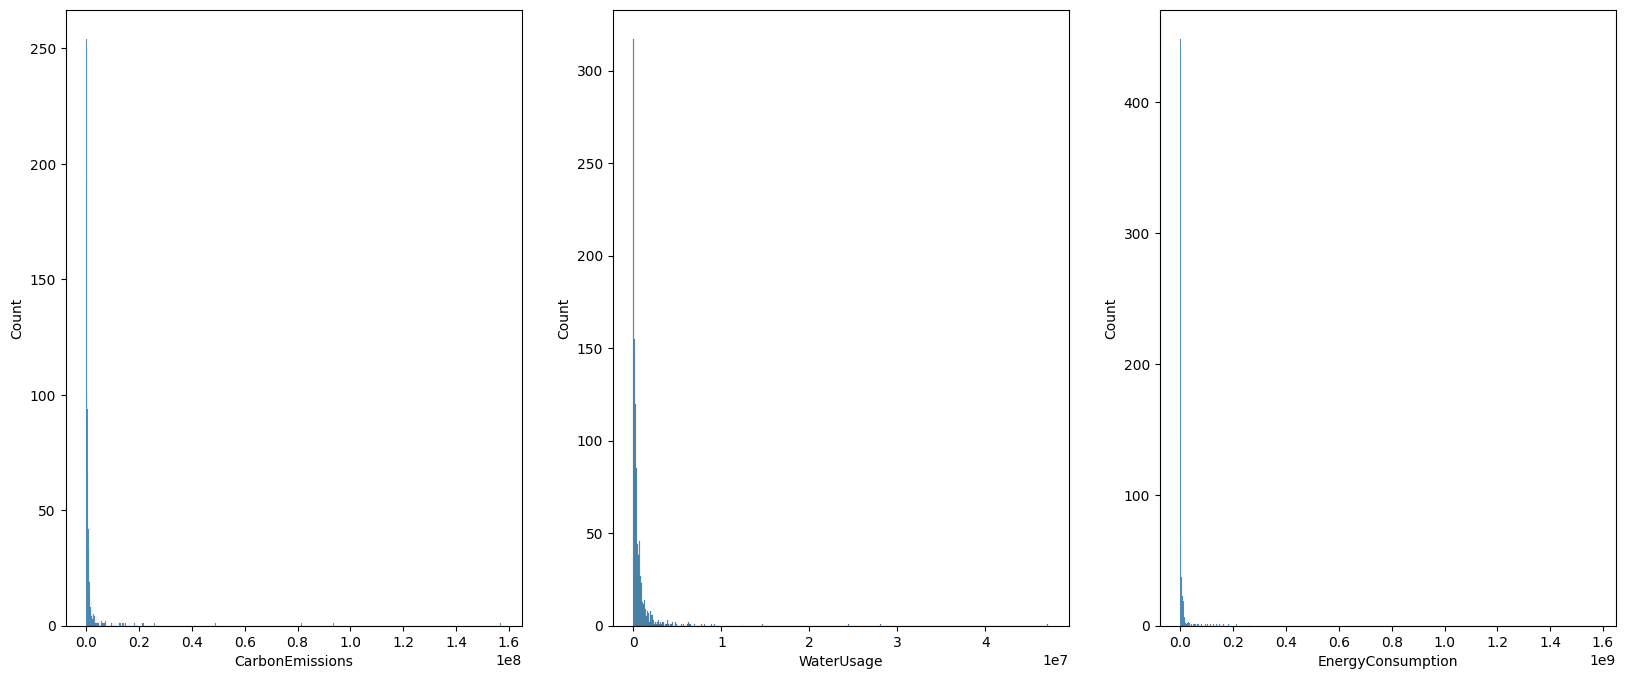

In [ ]:
# Distribution of CarbonEmissions, WaterUsage	and EnergyConsumption cols
fig, ax = plt.subplots(1, 3, figsize=(20,8))
sns.histplot(data=df, x='CarbonEmissions', ax=ax[0])
sns.histplot(data=df, x='WaterUsage', ax=ax[1])
sns.histplot(data=df, x='EnergyConsumption', ax=ax[2])
plt.show()

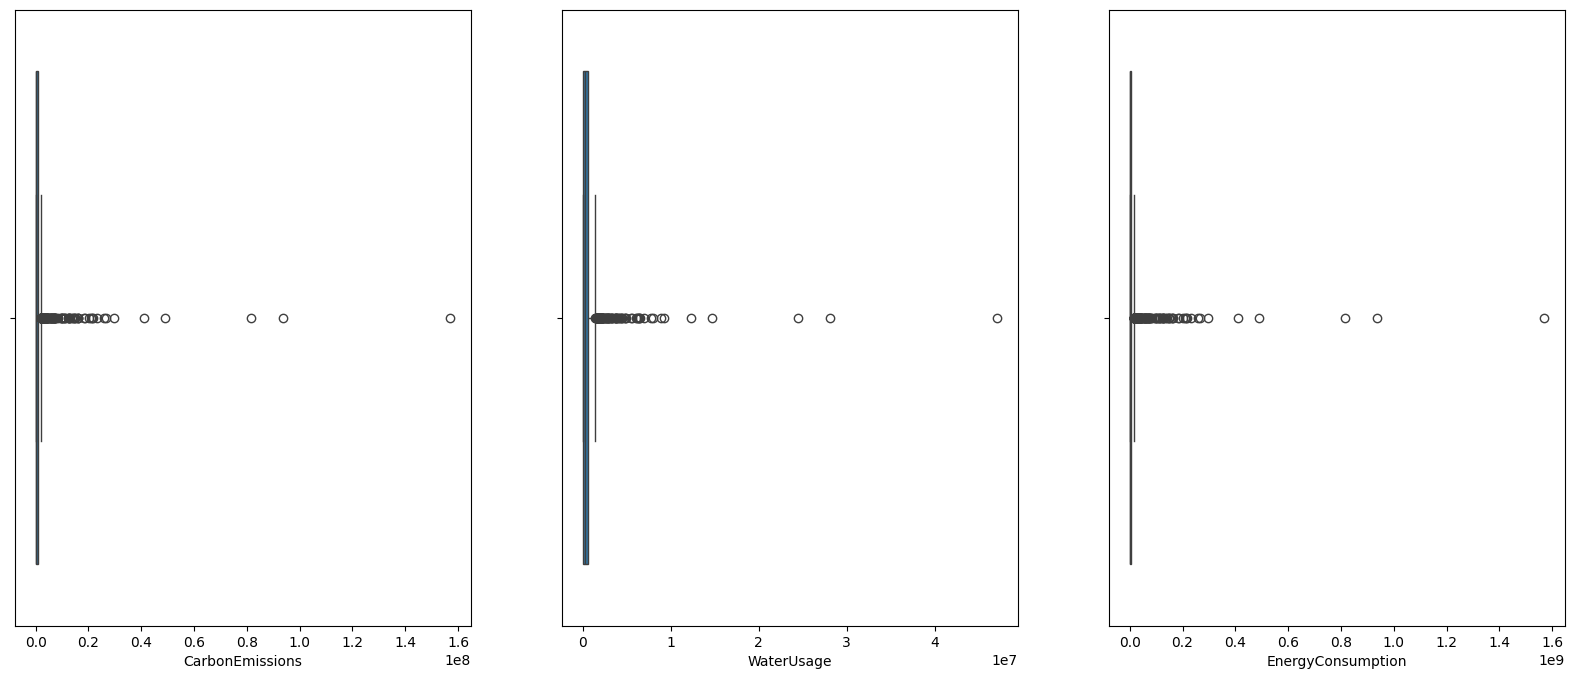

In [ ]:
# Box plot of CarbonEmissions, WaterUsage	and EnergyConsumption cols
fig, ax = plt.subplots(1, 3, figsize=(20,8))
sns.boxplot(data=df, x='CarbonEmissions', ax=ax[0])
sns.boxplot(data=df, x='WaterUsage', ax=ax[1])
sns.boxplot(data=df, x='EnergyConsumption', ax=ax[2])
plt.show()

In [ ]:
#
df['CarbonEmissions_log'] = np.log1p(df['CarbonEmissions'])
df['WaterUsage_log'] = np.log1p(df['WaterUsage'])
df['EnergyConsumption_log'] = np.log1p(df['EnergyConsumption'])

/tmp/ipython-input-650685119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CarbonEmissions_log'] = np.log1p(df['CarbonEmissions'])
/tmp/ipython-input-650685119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WaterUsage_log'] = np.log1p(df['WaterUsage'])
/tmp/ipython-input-650685119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

Phan phoi giong nhau giua cac cot CarbonEmissions, WaterUsage va EnergyConsumption

In [ ]:
esg_bottom_threshold = df['ESG_Overall'].quantile(0.25)
esg_top_threshold = df['ESG_Overall'].quantile(0.75)
esg_top_group = df[df['ESG_Overall'] >= esg_top_threshold]
esg_bottom_group = df[df['ESG_Overall'] <= esg_bottom_threshold]
financial_metrics = ['ProfitMargin', 'GrowthRate', 'MarketCap']
top_group_avg = esg_top_group[financial_metrics].mean()
bottom_group_avg = esg_bottom_group[financial_metrics].mean()

comparison_df = pd.DataFrame({
    'ESG Top 25%': top_group_avg,
    'ESG Bottom 25%': bottom_group_avg})
print(comparison_df.round(4))

              ESG Top 25%  ESG Bottom 25%
ProfitMargin      12.3909         11.1414
GrowthRate         6.2190          4.7606
MarketCap      31317.0790       9635.5020


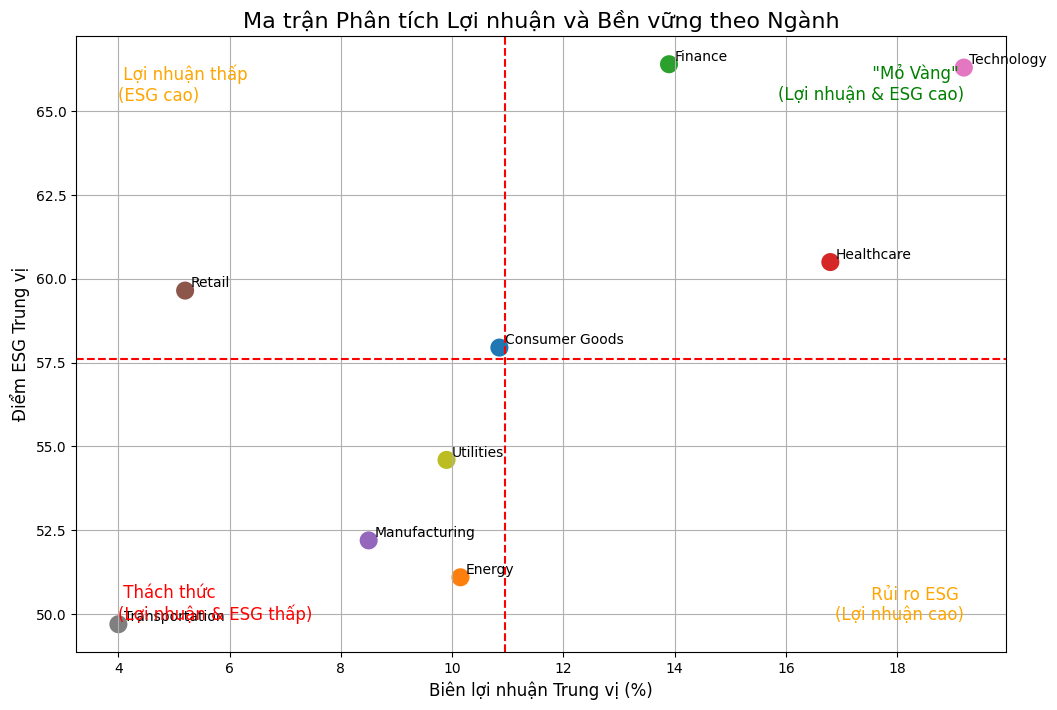

In [ ]:
industry_performance = df.groupby('Industry')[['ESG_Overall', 'ProfitMargin']].median().reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=industry_performance, x='ProfitMargin', y='ESG_Overall', s=200, hue='Industry', legend=False)
for i in range(industry_performance.shape[0]):
    plt.text(x=industry_performance.ProfitMargin[i] + 0.1,
             y=industry_performance.ESG_Overall[i] + 0.1,
             s=industry_performance.Industry[i],
             fontdict=dict(color='black', size=10))
plt.axvline(industry_performance.ProfitMargin.mean(), color='red', linestyle='--')
plt.axhline(industry_performance.ESG_Overall.mean(), color='red', linestyle='--')
plt.text(industry_performance.ProfitMargin.max(), industry_performance.ESG_Overall.max(), ' "Mỏ Vàng" \n(Lợi nhuận & ESG cao)', ha='right', va='top', fontsize=12, color='green')
plt.text(industry_performance.ProfitMargin.min(), industry_performance.ESG_Overall.min(), ' Thách thức \n(Lợi nhuận & ESG thấp)', ha='left', va='bottom', fontsize=12, color='red')
plt.text(industry_performance.ProfitMargin.min(), industry_performance.ESG_Overall.max(), ' Lợi nhuận thấp \n(ESG cao)', ha='left', va='top', fontsize=12, color='orange')
plt.text(industry_performance.ProfitMargin.max(), industry_performance.ESG_Overall.min(), ' Rủi ro ESG \n(Lợi nhuận cao)', ha='right', va='bottom', fontsize=12, color='orange')
plt.title('Ma trận Phân tích Lợi nhuận và Bền vững theo Ngành', fontsize=16)
plt.xlabel('Biên lợi nhuận Trung vị (%)', fontsize=12)
plt.ylabel('Điểm ESG Trung vị', fontsize=12)
plt.grid(True)

## Bivariate analysis

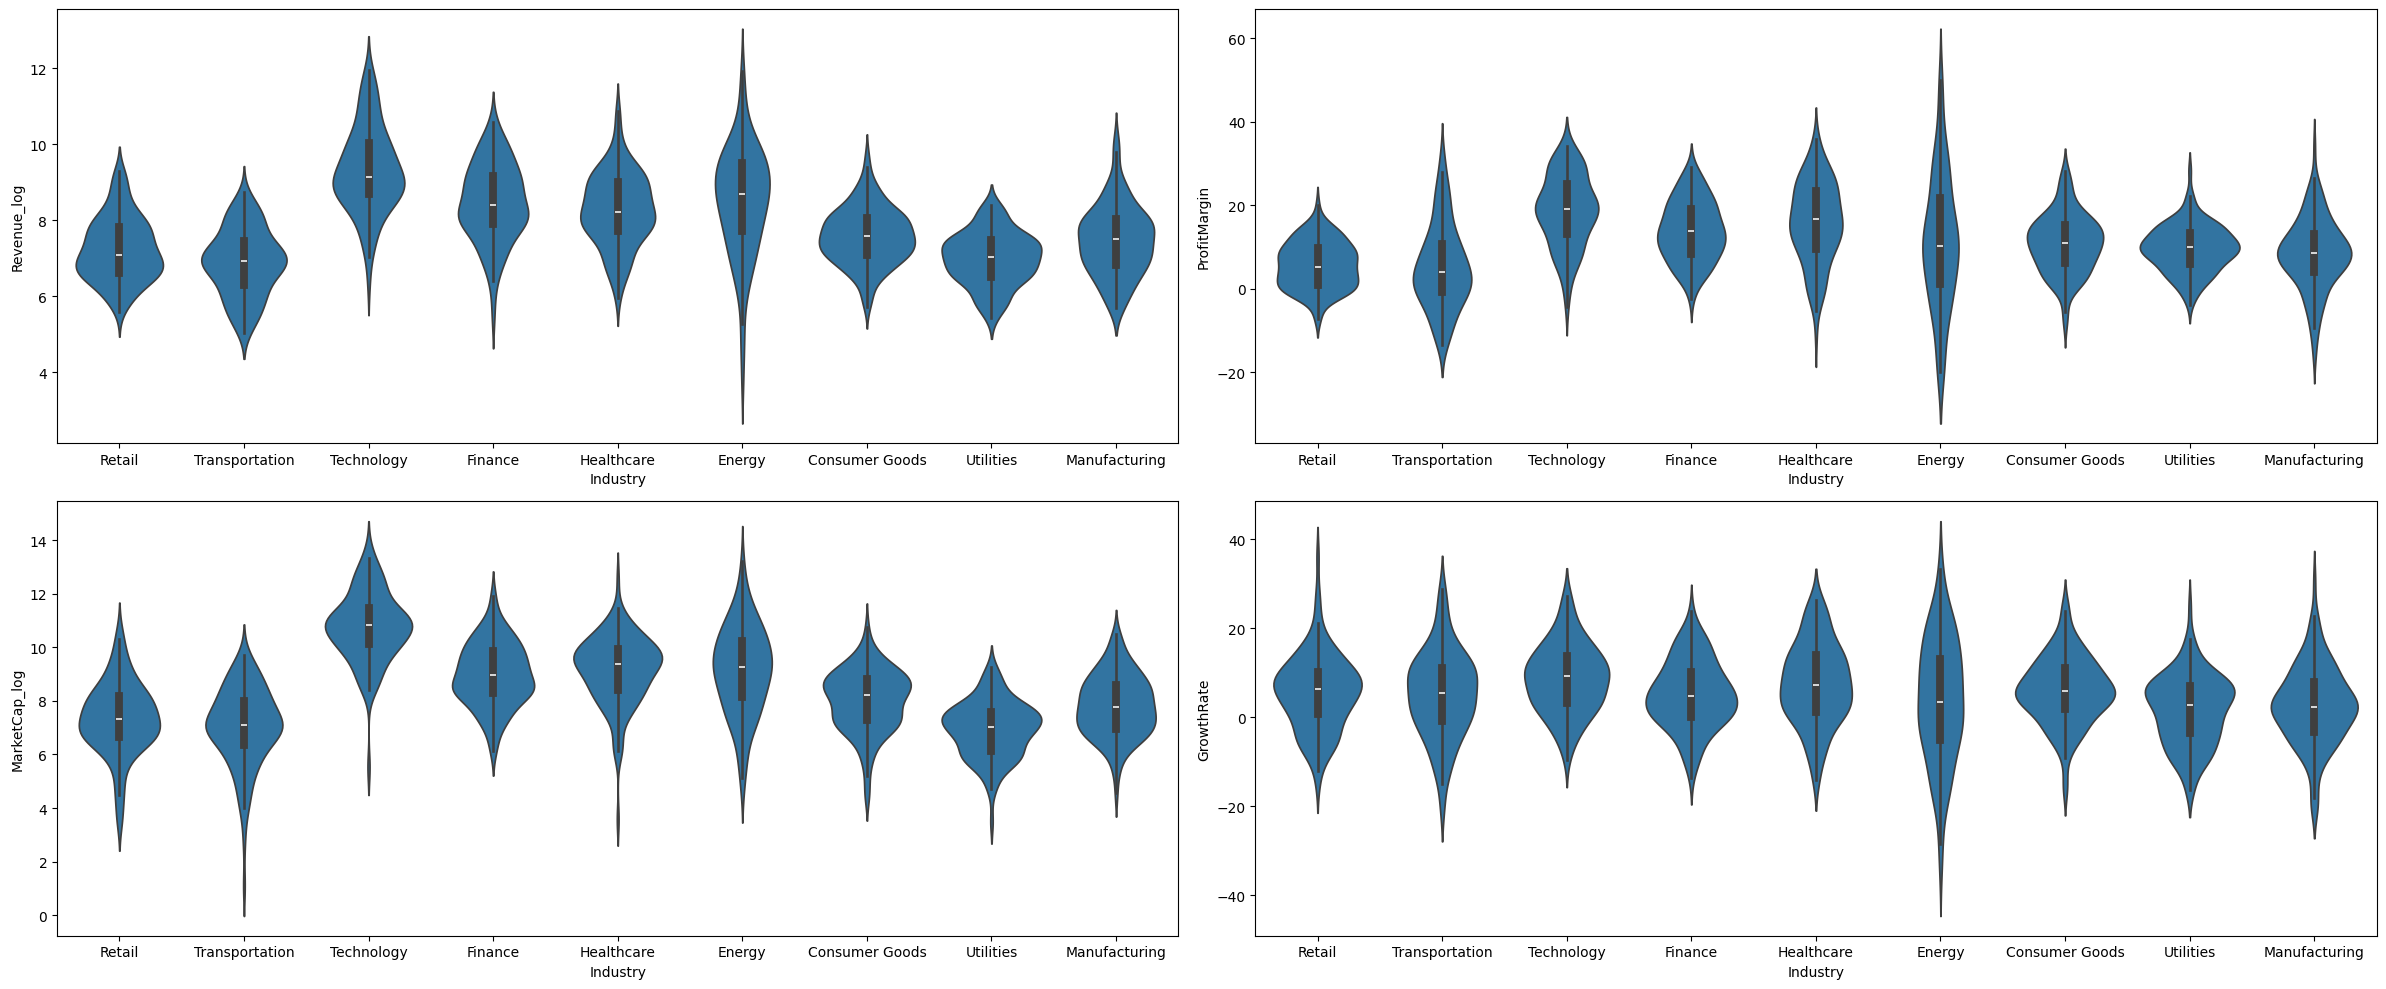

In [ ]:
# Violin plot of Revenue, ProfitMargin, Marketcap and GrowthRate between industry
fig, ax = plt.subplots(2, 2, figsize=(24, 10))
sns.violinplot(data=df, x='Industry', y='Revenue_log', ax=ax[0, 0])
sns.violinplot(data=df, x='Industry', y='ProfitMargin', ax=ax[0, 1])
sns.violinplot(data=df, x='Industry', y='MarketCap_log', ax=ax[1, 0])
sns.violinplot(data=df, x='Industry', y='GrowthRate', ax=ax[1, 1])
plt.tight_layout()

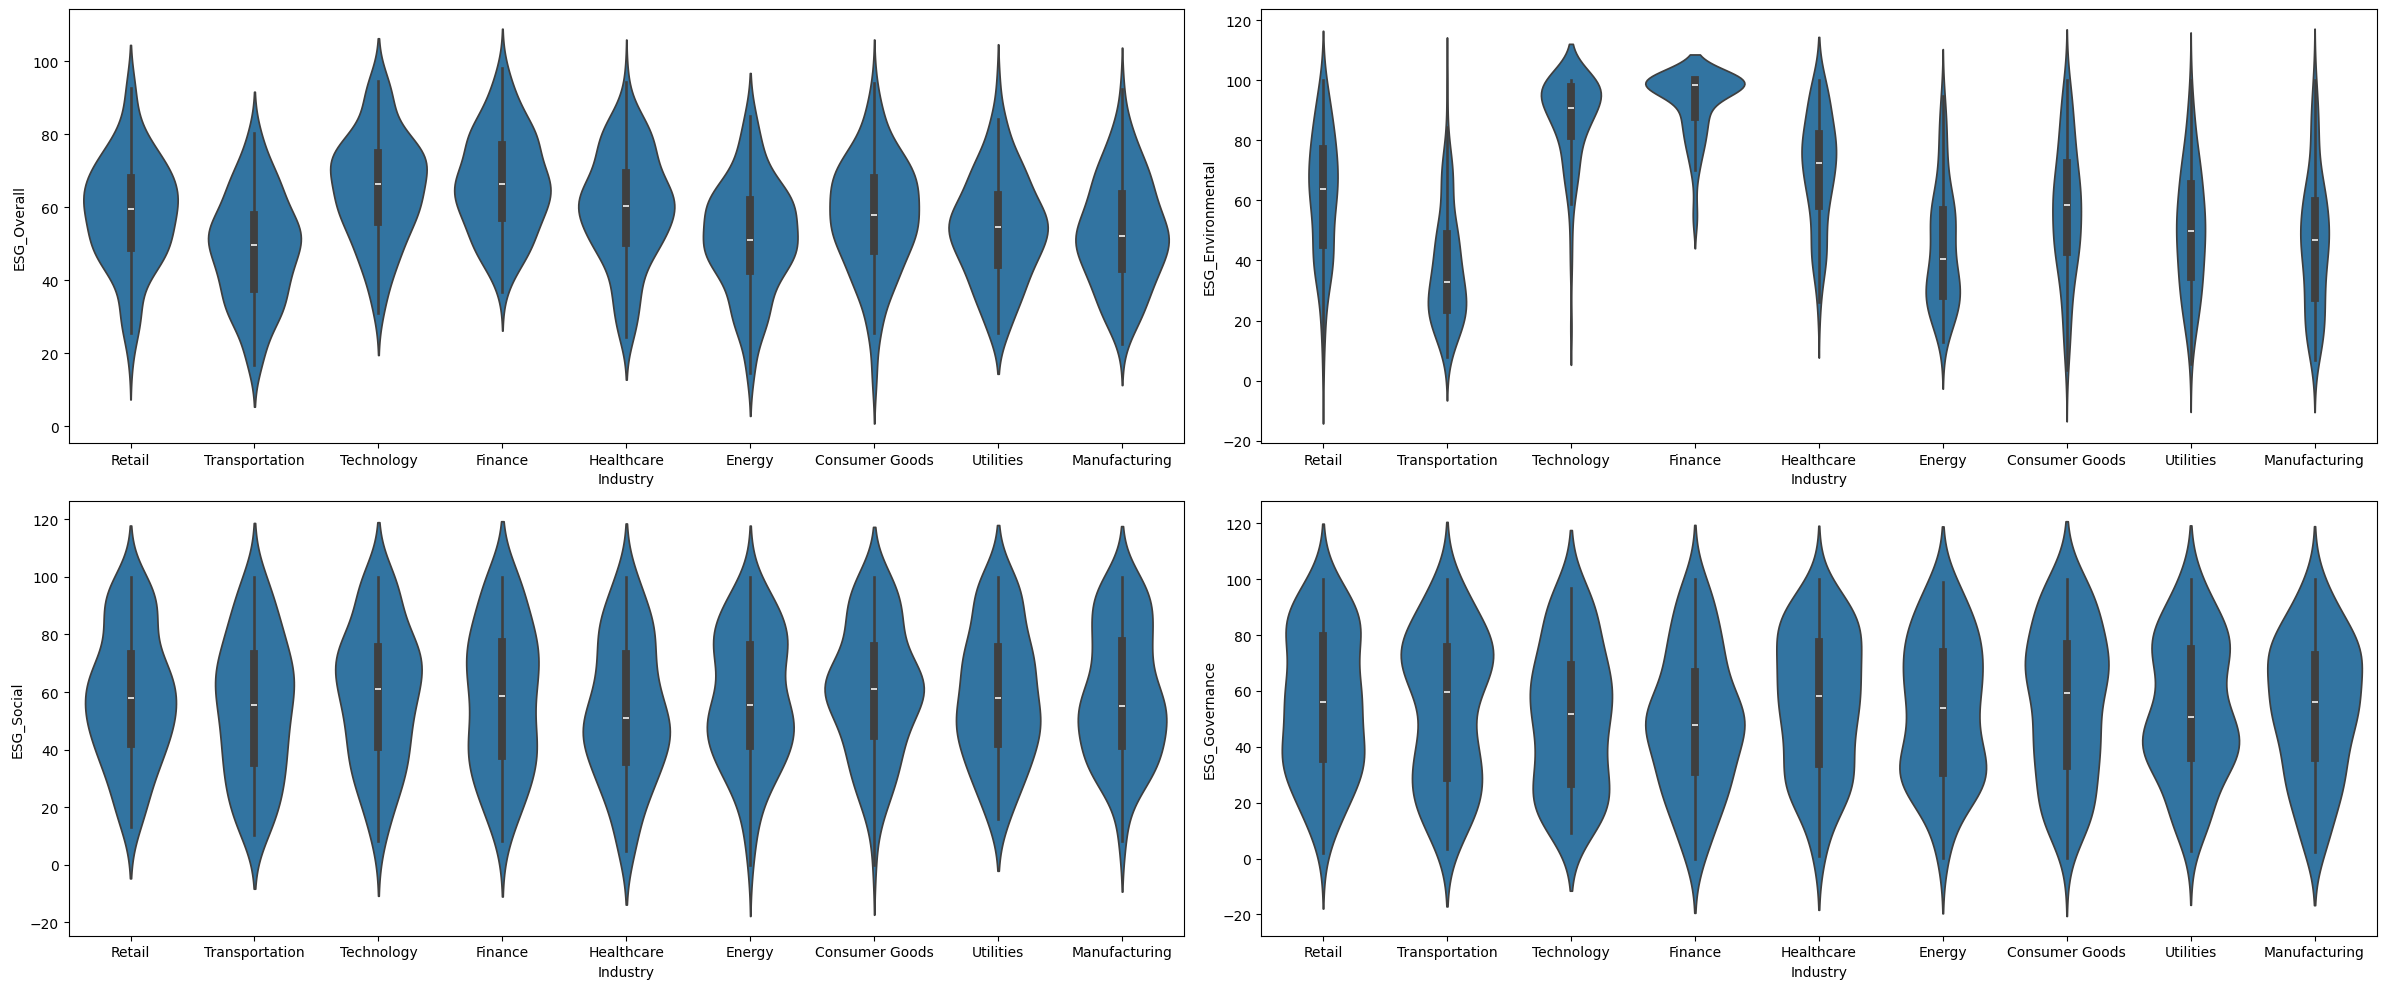

In [ ]:
# Violin plot of ESG_Overall, ESG_Environmental, ESG_Social and ESG_Governance cols between industry
fig, ax = plt.subplots(2, 2, figsize=(24, 10))
sns.violinplot(data=df, x='Industry', y='ESG_Overall', ax=ax[0, 0])
sns.violinplot(data=df, x='Industry', y='ESG_Environmental', ax=ax[0, 1])
sns.violinplot(data=df, x='Industry', y='ESG_Social', ax=ax[1, 0])
sns.violinplot(data=df, x='Industry', y='ESG_Governance', ax=ax[1, 1])
plt.tight_layout()
plt.show()

- ESG_Social, ESG_Governance khong co su khac biet giua cac nganh nghe, dieu nay cho thay cac nganh nghe deu chiu anh huong cua xa hoi va chinh phu va muc do chiu anh huong cung tuong dong nhau
- ESG_Environmental co su khac biet dang ke giua cac nganh nghe, khien cho ESG_Total co su khac biet nhe

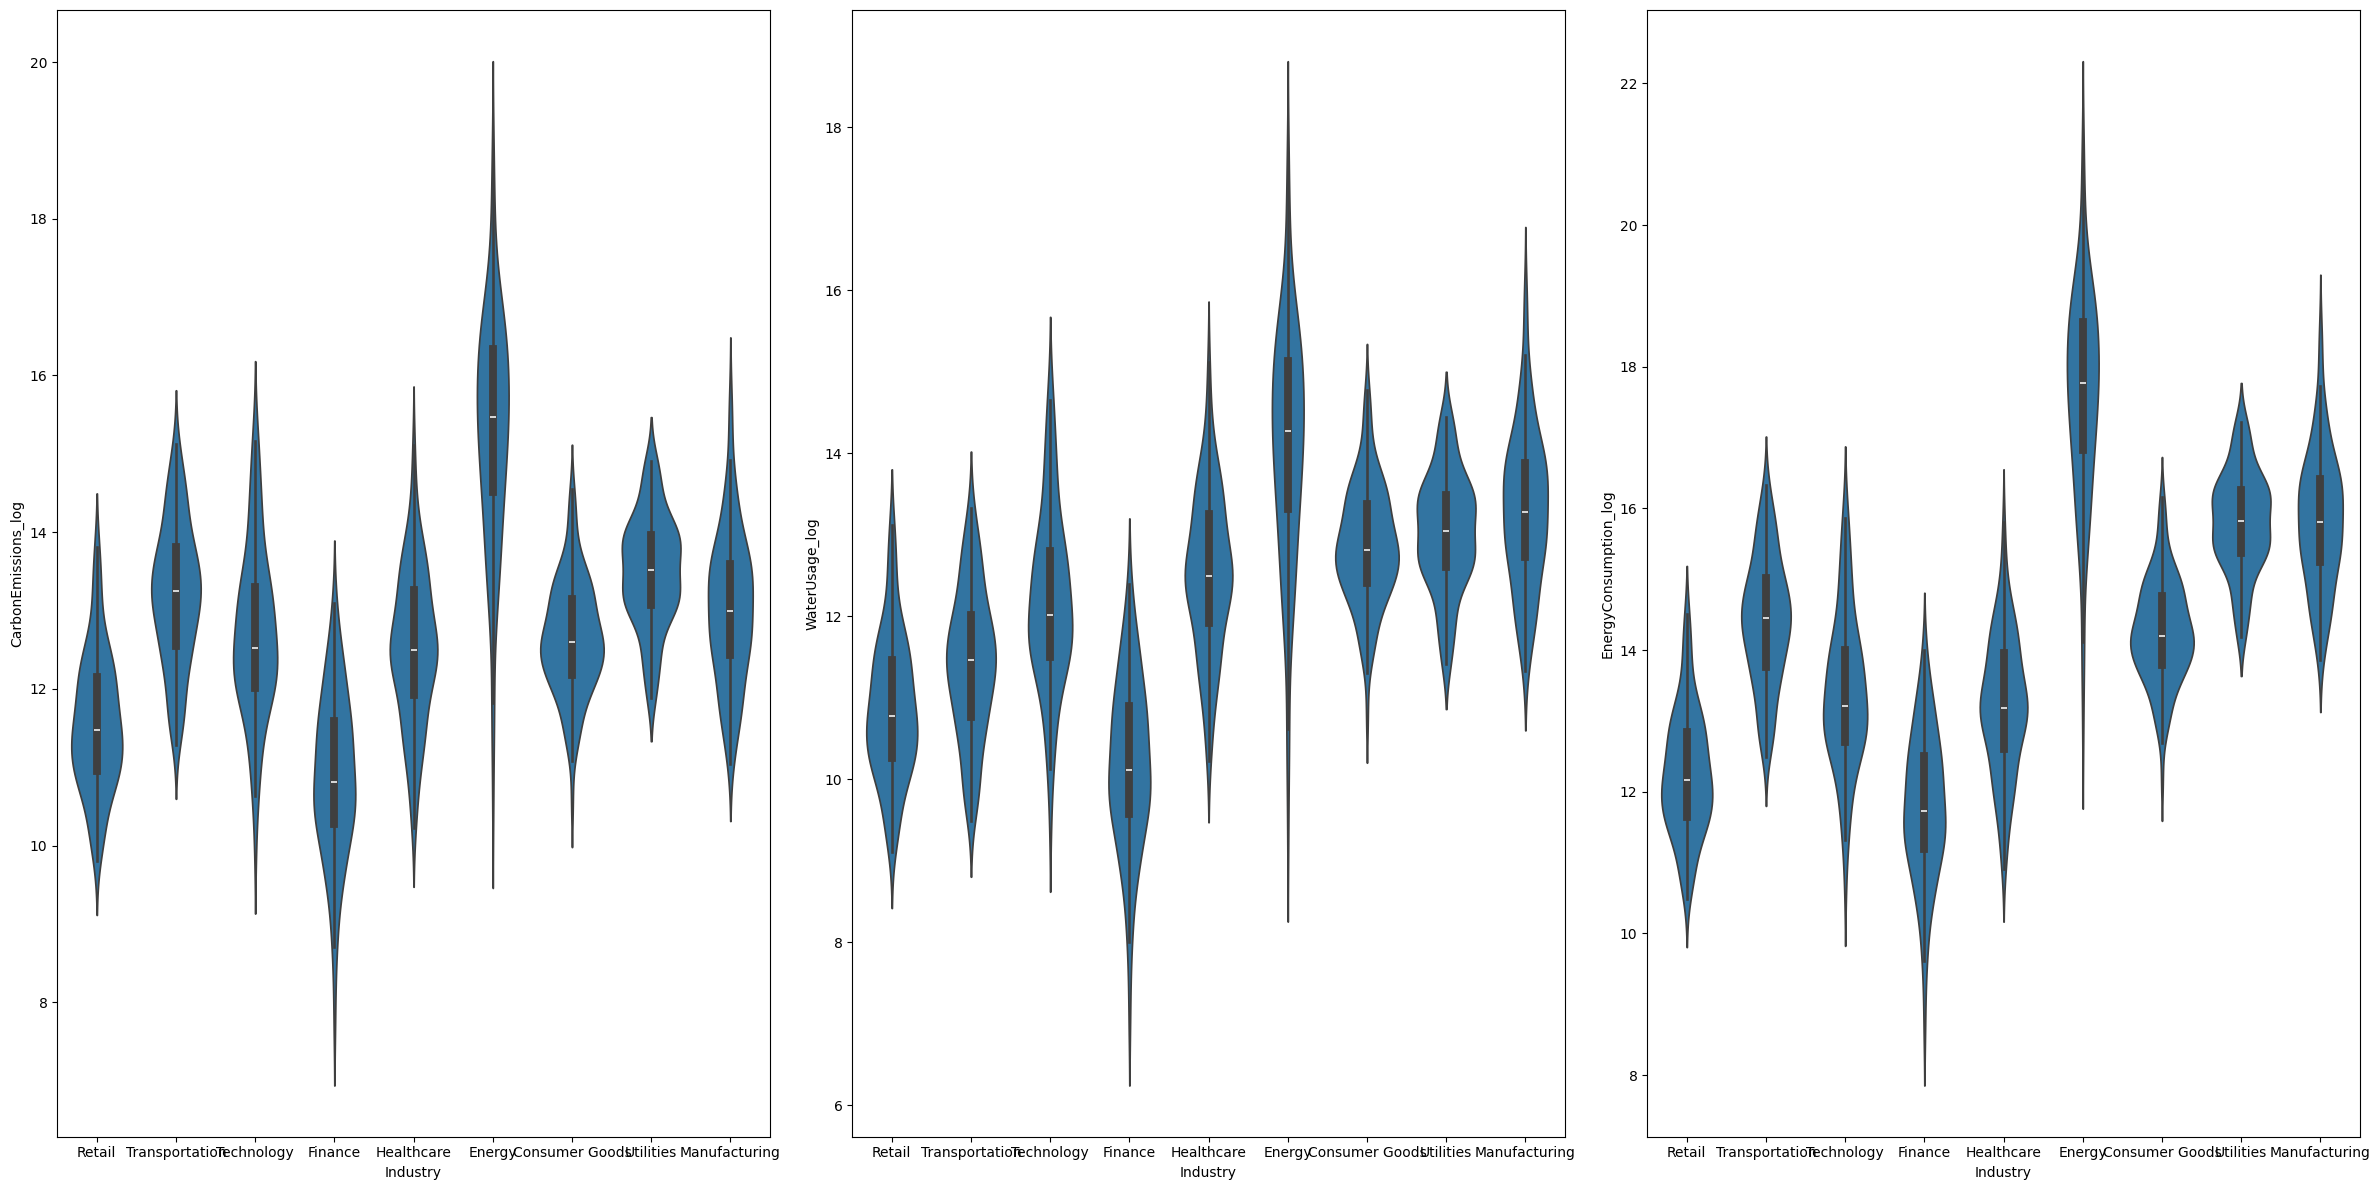

In [ ]:
# Violin plot of CarbonEmissions, WaterUsage	and EnergyConsumption between industry
fig, ax = plt.subplots(1, 3, figsize=(24,12))
sns.violinplot(data=df, x='Industry', y='CarbonEmissions_log', ax=ax[0])
sns.violinplot(data=df, x='Industry', y='WaterUsage_log', ax=ax[1])
sns.violinplot(data=df, x='Industry', y='EnergyConsumption_log', ax=ax[2])
plt.tight_layout()
plt.show()

Cac gia tri CarbonEmissions, WaterUsage, EnergyConsumption giong nhau giua cac nganh nghe

Co the thay duoc, industry cung la mot nhan to quan trong giup phan cum doanh nghiep, tuy nhien su khac biet cua cac nganh nghe cung duoc phan anh ngay tren cac chi so nhu ProfitMargin, MarketCap, va dac biet la ESG

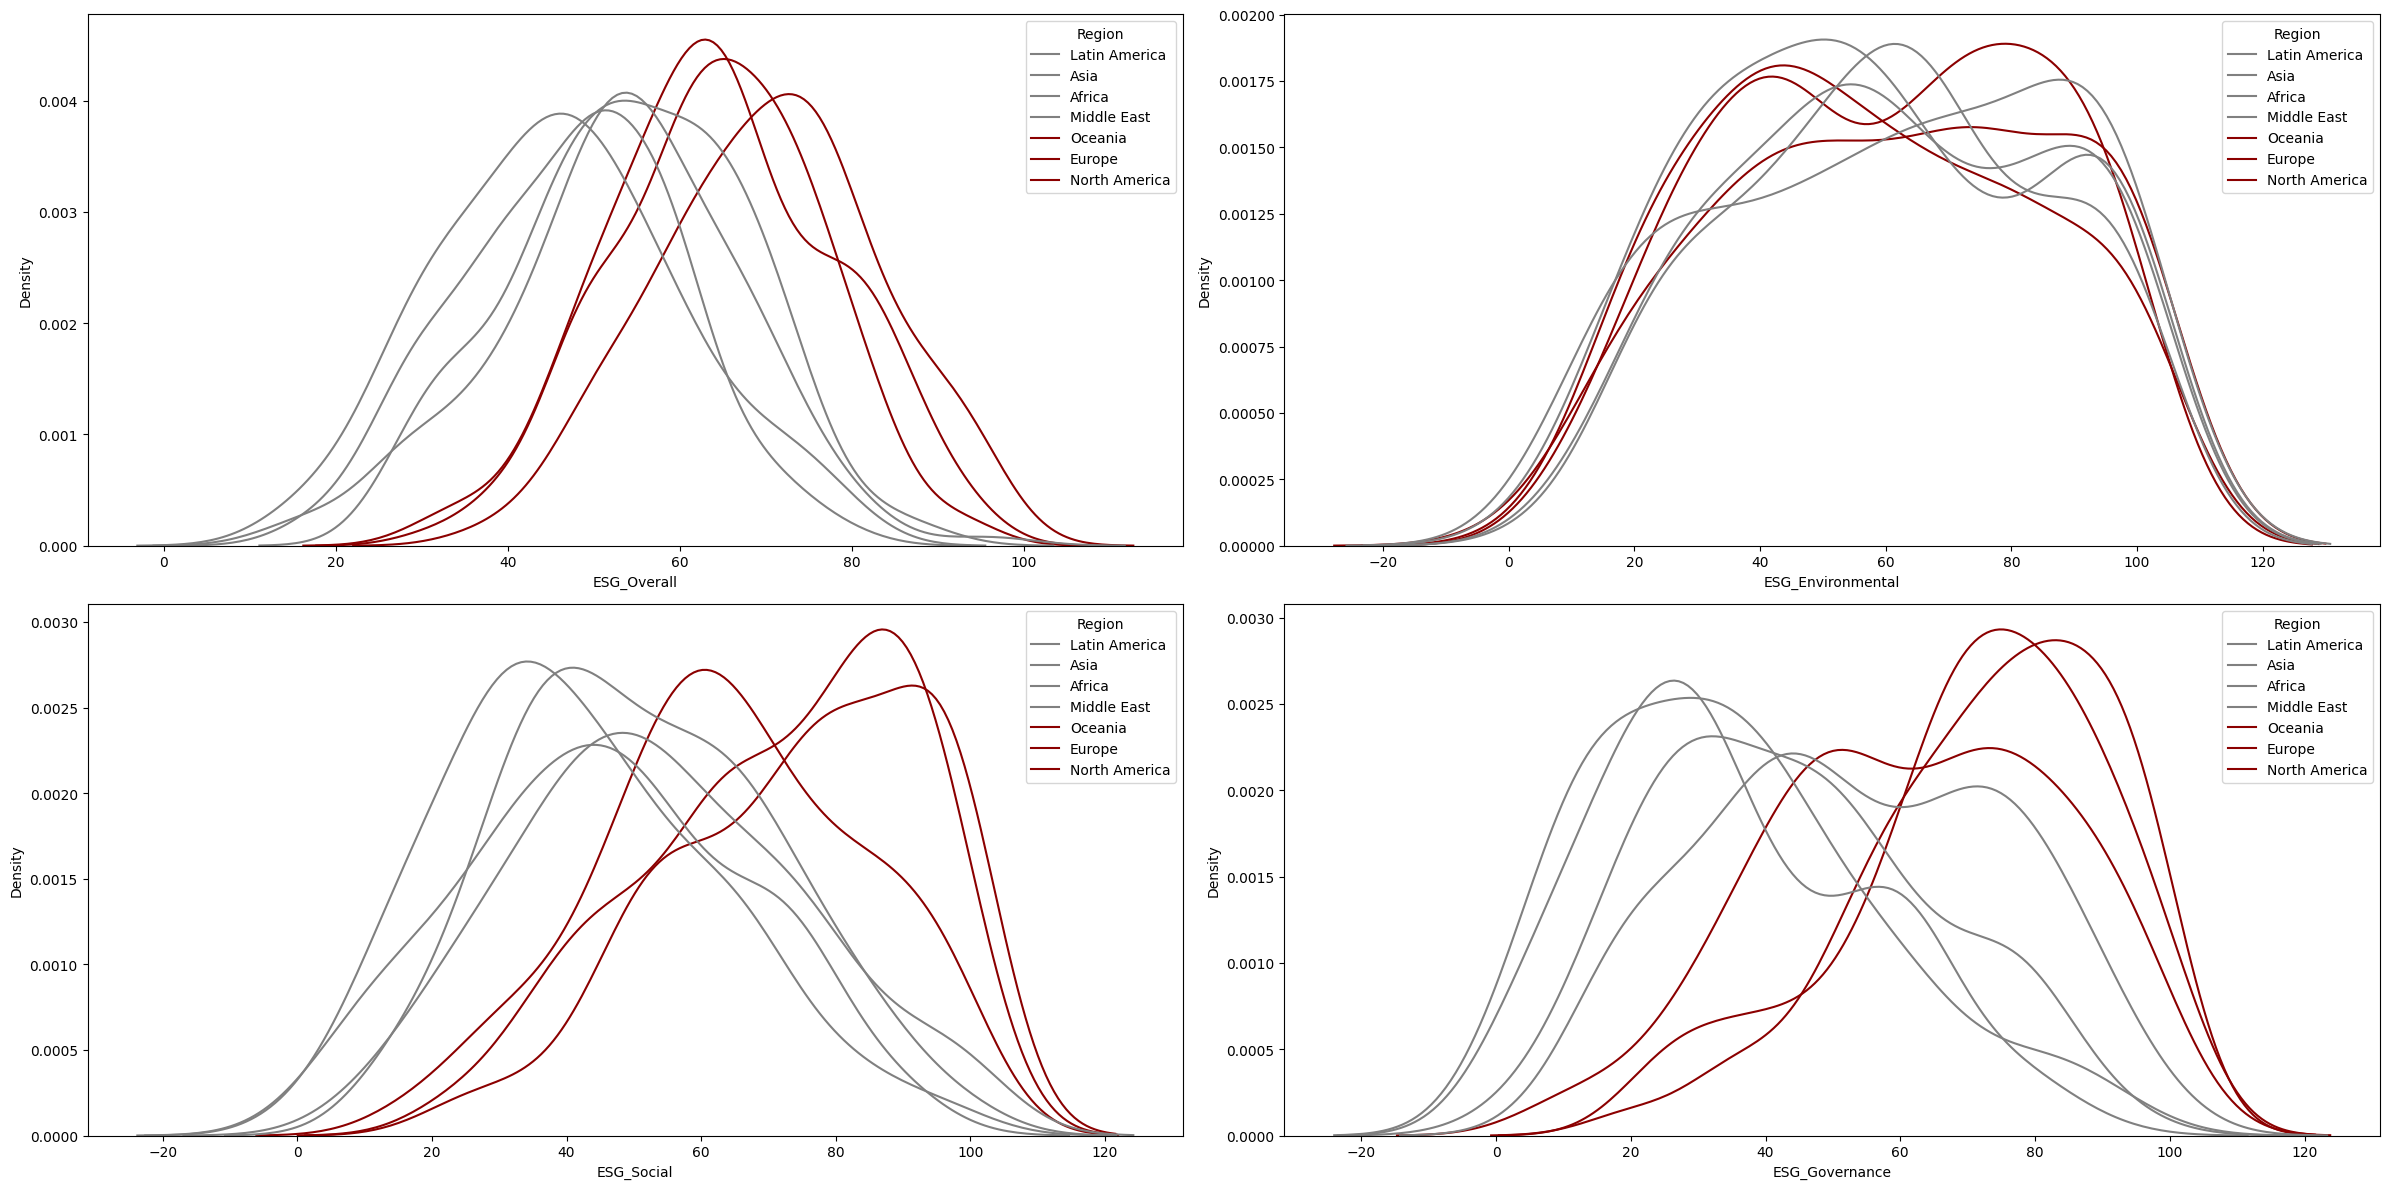

In [ ]:
# KDE plot of ESG_Overall, ESG_Environmental, ESG_Social and ESG_Governance cols between Region
palette = {
    "Oceania": "darkred",
    "Europe": "darkred",
    "North America": "darkred",
    "Latin America": "gray",
    "Asia": "gray",
    "Africa": "gray",
    "Middle East": "gray"
}

fig, ax = plt.subplots(2, 2, figsize=(24, 12))
sns.kdeplot(data=df, x='ESG_Overall', hue='Region', ax=ax[0, 0], palette=palette)
sns.kdeplot(data=df, x='ESG_Environmental', hue='Region', ax=ax[0, 1], palette=palette)
sns.kdeplot(data=df, x='ESG_Social', hue='Region', ax=ax[1, 0], palette=palette)
sns.kdeplot(data=df, x='ESG_Governance', hue='Region', ax=ax[1, 1], palette=palette)
plt.tight_layout()
plt.show()

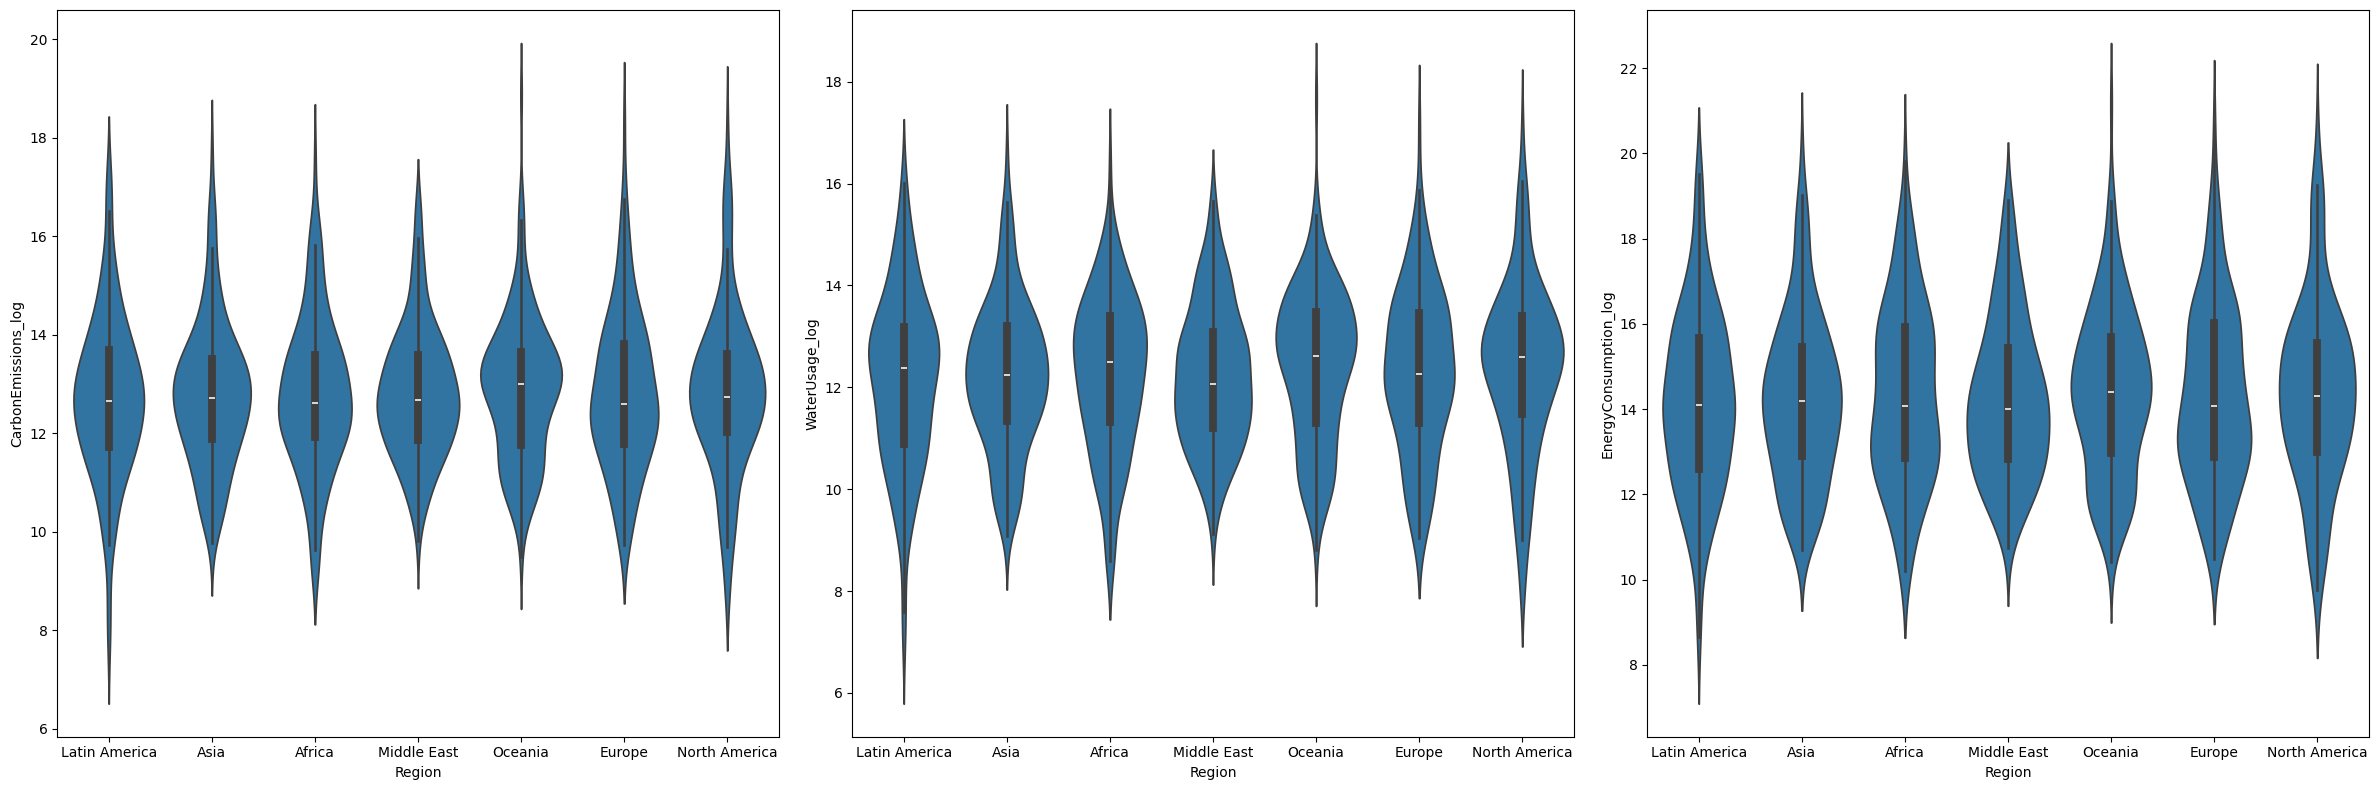

In [ ]:
# Violin plot of CarbonEmissions, WaterUsage	and EnergyConsumption between Region
fig, ax = plt.subplots(1, 3, figsize=(24,8))
sns.violinplot(data=df, x='Region', y='CarbonEmissions_log', ax=ax[0])
sns.violinplot(data=df, x='Region', y='WaterUsage_log', ax=ax[1])
sns.violinplot(data=df, x='Region', y='EnergyConsumption_log', ax=ax[2])
plt.tight_layout()
plt.show()

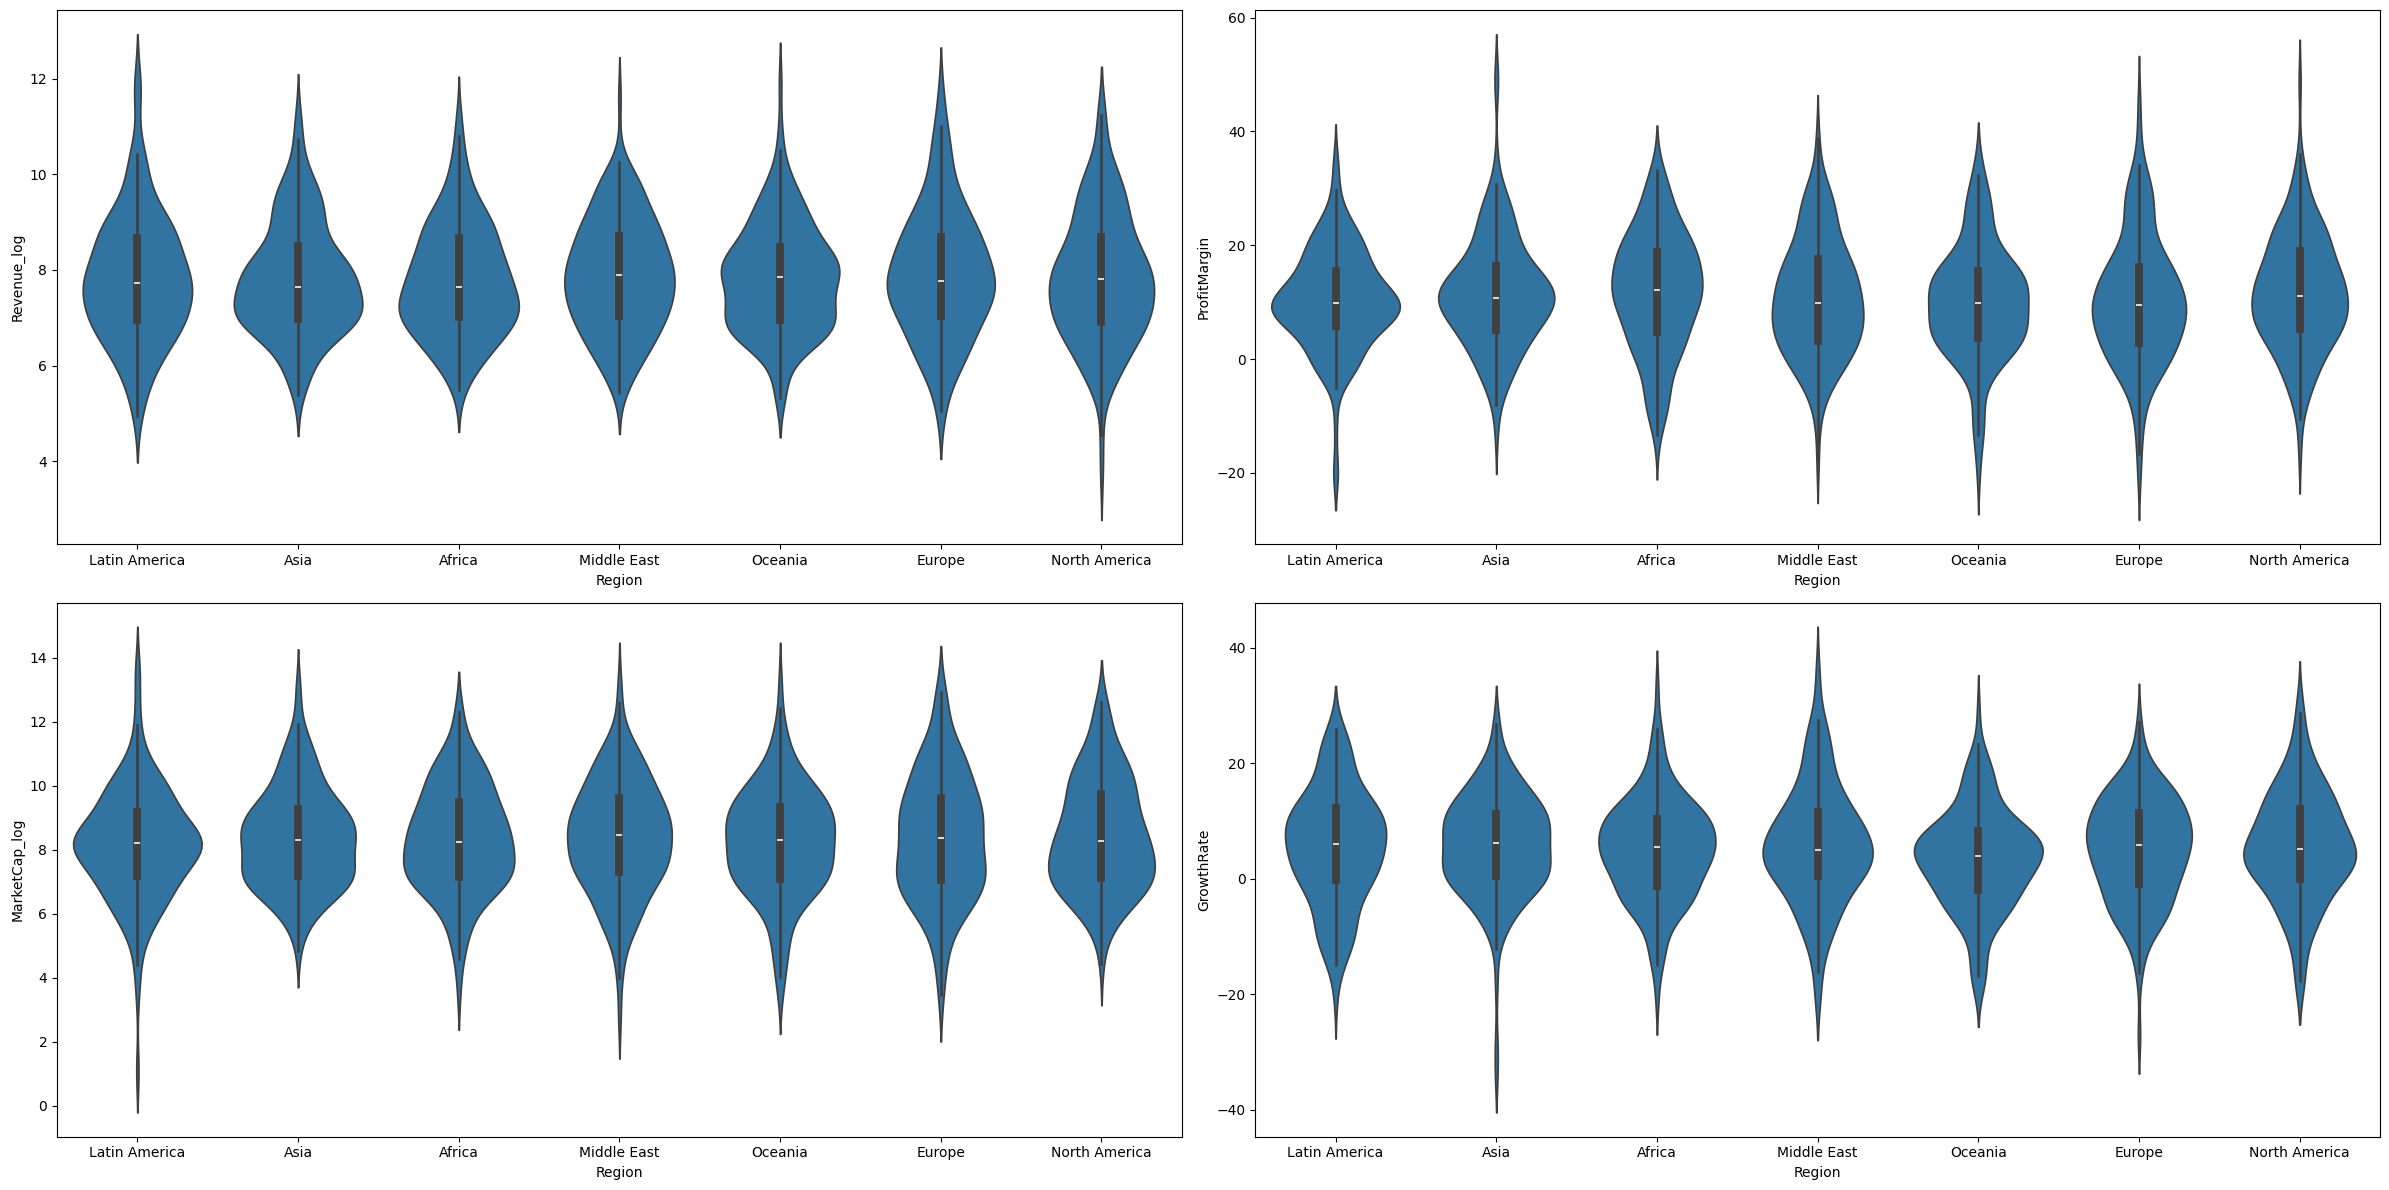

In [ ]:
# Violin plot of Revenue, ProfitMargin, Marketcap and GrowthRate between Region
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
sns.violinplot(data=df, x='Region', y='Revenue_log', ax=ax[0, 0])
sns.violinplot(data=df, x='Region', y='ProfitMargin', ax=ax[0, 1])
sns.violinplot(data=df, x='Region', y='MarketCap_log', ax=ax[1, 0])
sns.violinplot(data=df, x='Region', y='GrowthRate', ax=ax[1, 1])
plt.tight_layout()

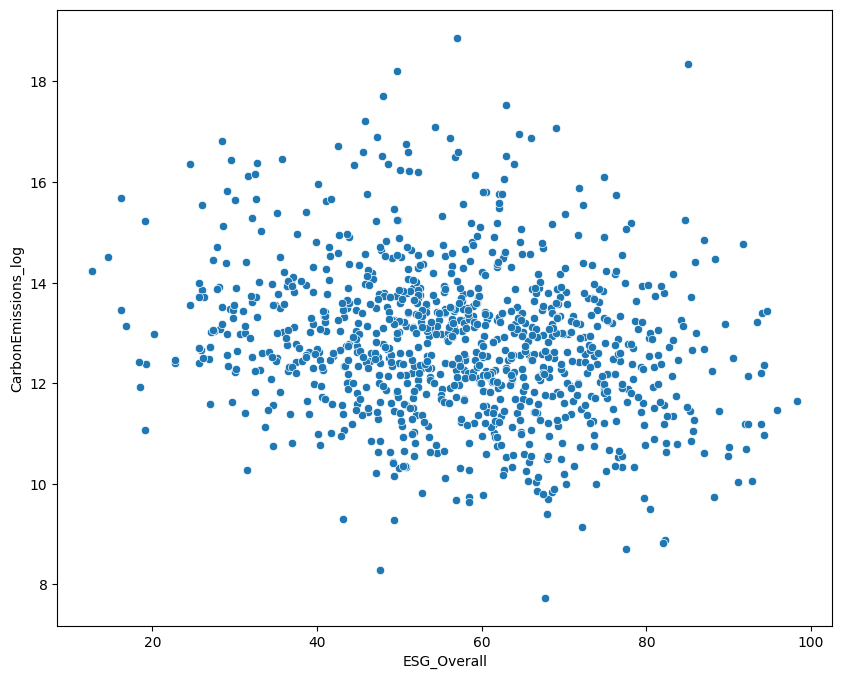

In [ ]:
# Scatter plot between ESG Overall with CarbonEmissions
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='ESG_Overall', y='CarbonEmissions_log')
plt.show()

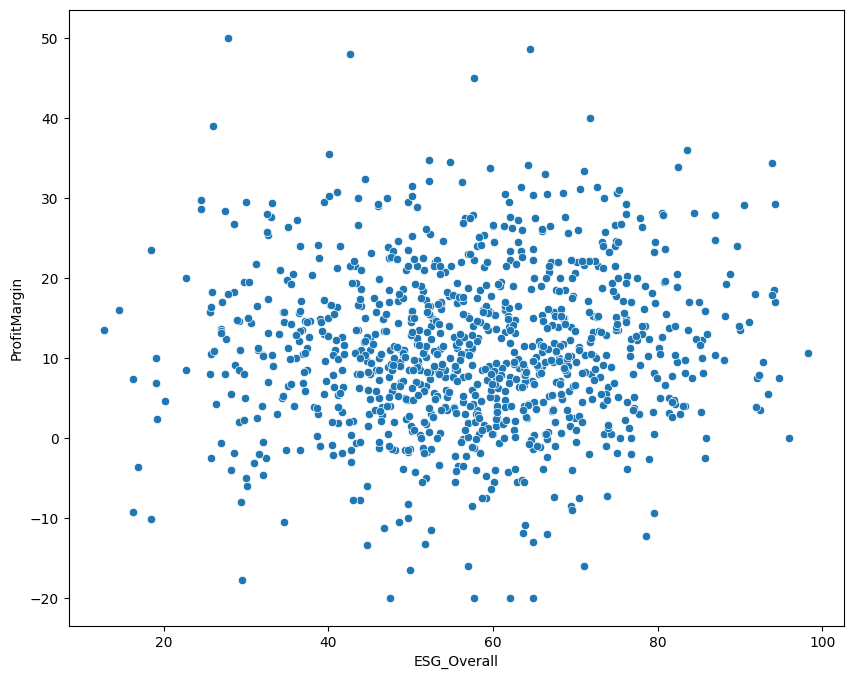

In [ ]:
# Scatter plot between ESG Overall with ProfitMargin
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='ESG_Overall', y='ProfitMargin')
plt.show()

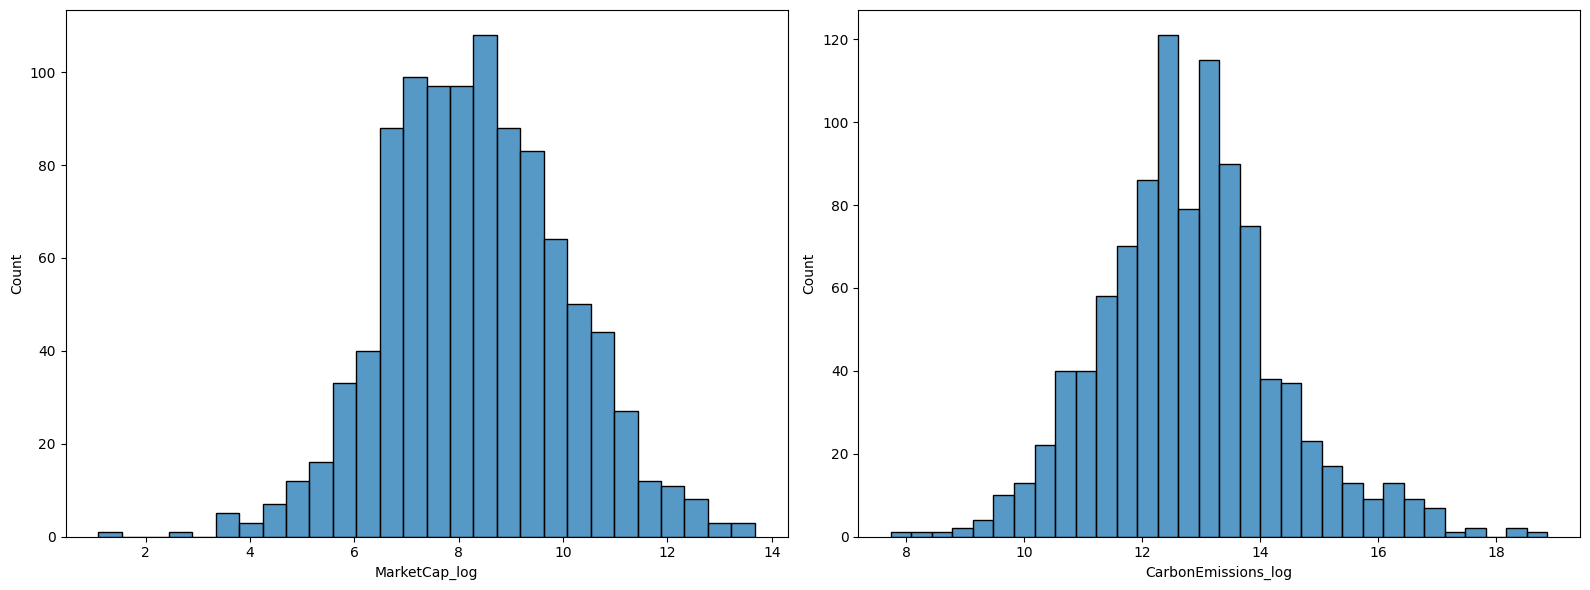

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df, x='MarketCap_log', ax=ax[0])
sns.histplot(data=df, x='CarbonEmissions_log', ax=ax[1])
plt.tight_layout()
plt.show()

## Correlation matrix

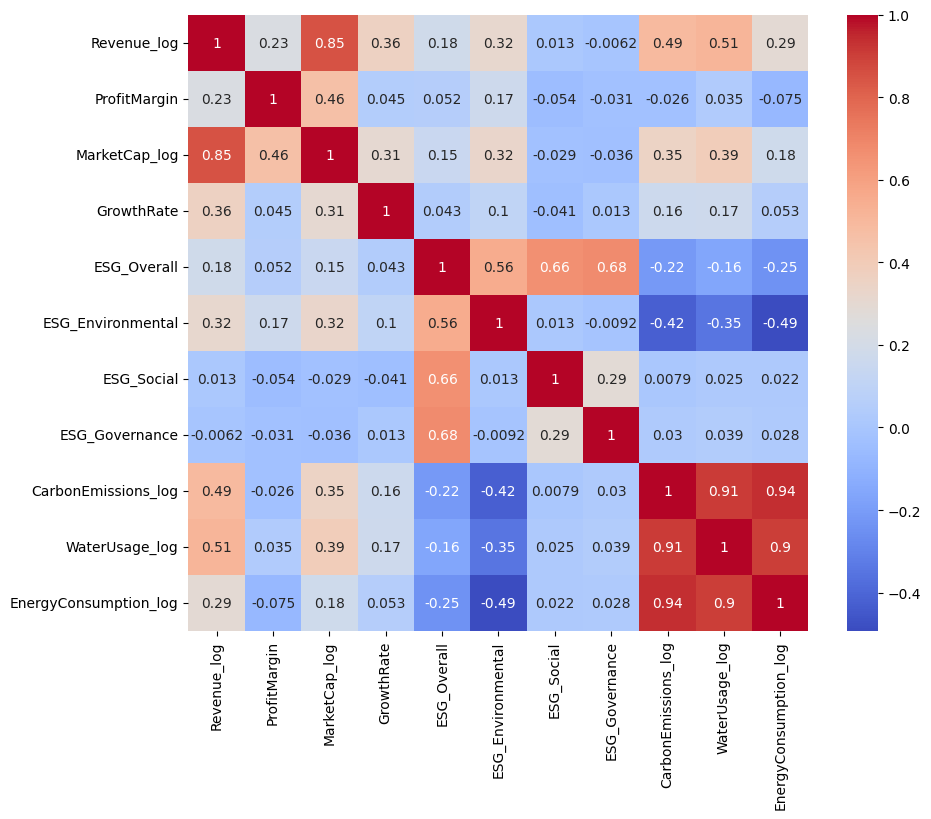

In [ ]:
# Correlation matrix between num_cols
num_cols = ['Revenue_log', 'ProfitMargin', 'MarketCap_log', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions_log', 'WaterUsage_log', 'EnergyConsumption_log']
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- Revenue va MarketCap co muc tuong quan manh: 0.86. Vi vay can loai bo 1 bien. Theo he so tuong quan, Revenue cung co muc tuong quan cao voi cac chi so CarbonEmissions, WaterUsage, EnergyConsumption nen can loai bo -> Loai bo Revenue
- ESG_Overall co muc tuong quan cao voi 3 chi so ESG. Tu cac insight rut ra tu phan tich don bien va da bien + he so tuong quan -> Chi giu lai ESG_Overall
- 3 chi so CarbonEmissions, WaterUsage va EnergyConsumption co muc tuong quan rat cao ~ 1 va he so tuong quan cung tuong dong nhau voi cac bien khac -> Giu lai 1 bien bat ky

# Model Building

## K - Means

In [ ]:
# Feature selection
cluster_cols = ['ProfitMargin', 'MarketCap_log', 'GrowthRate', 'ESG_Overall', 'CarbonEmissions_log']
df_cluster = df[cluster_cols]
df_cluster

,ProfitMargin,MarketCap_log,GrowthRate,ESG_Overall,CarbonEmissions_log
9,4.6,6.133615,7.9,58.5,10.805479
20,-1.2,8.667129,3.6,65.7,12.555535
31,10.3,6.607191,5.5,32.1,12.514890
42,26.0,10.724425,12.2,63.5,12.006883
53,22.5,9.176163,0.0,47.4,10.641125
...,...,...,...,...,...
10954,24.4,10.319533,8.9,60.1,12.746705
10965,11.5,6.598781,1.8,66.1,12.966832
10976,30.5,9.479061,3.5,66.5,11.428585
10987,21.5,9.195450,5.5,53.6,10.932721


In [ ]:
# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
print(df_scaled)

[[-0.63438222 -1.27560502  0.29601377  0.08421494 -1.32323385]
 [-1.2135261   0.19540634 -0.16501677  0.54242363 -0.16706306]
 [-0.06522358 -1.00063711  0.0386944  -1.59588361 -0.193915  ]
 ...
 [ 1.95179475  0.66683104 -0.17573841  0.59333571 -0.91158022]
 [ 1.05312321  0.50216042  0.0386944  -0.22762153 -1.23917129]
 [ 0.47397934  0.30047753 -1.28006737 -0.32944569  0.12492471]]


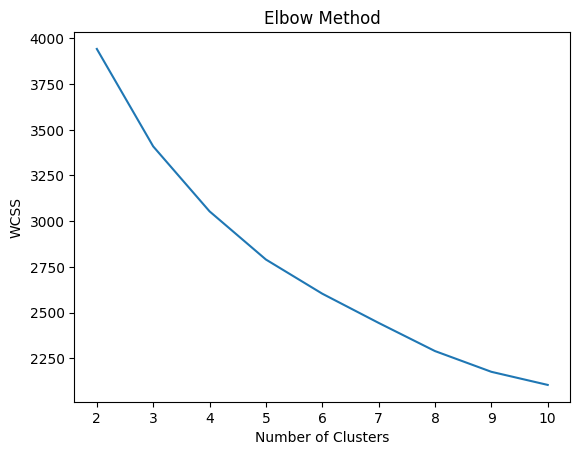

In [ ]:
# Select K using Elbow Method
wcss = []
for k in range (2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

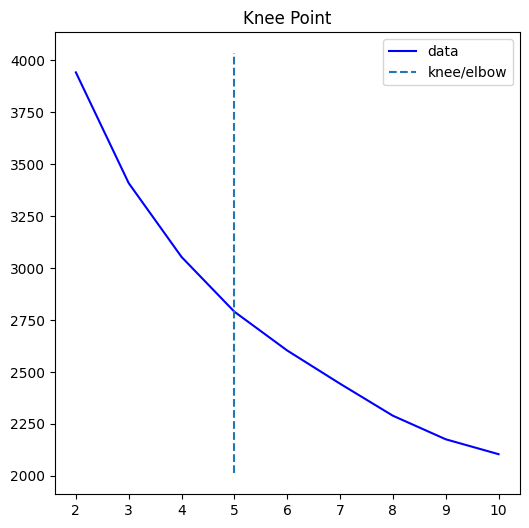

In [ ]:
kl = KneeLocator(range(2,11), wcss, curve="convex", direction="decreasing")
kl.plot_knee()
plt.show()

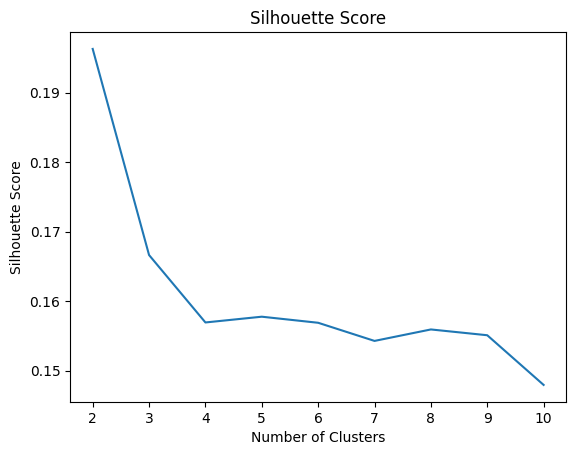

In [ ]:
# Sihouette method
sil_score = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  sil_score.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(range(2,11), sil_score)
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Co the khong can dua vo, chi can dung ket qua Elbow de chon so luong cum

In [ ]:
# Model Building
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(df_scaled)

df_cluster['Cluster'] = kmeans.labels_
df['Cluster'] = kmeans.labels_

/tmp/ipython-input-691032913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.labels_
/tmp/ipython-input-691032913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


# Cluster Analysis

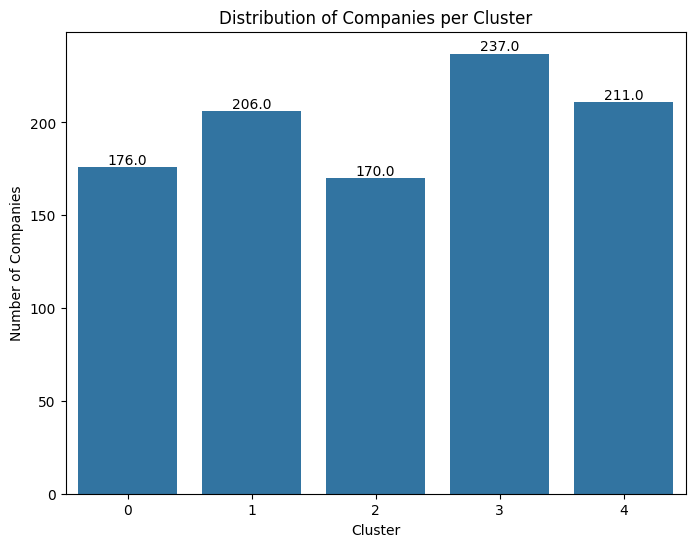

In [ ]:
# Countplot of Cluster
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Cluster')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Companies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Companies')
plt.show()

In [ ]:
# Centroid values for each cluster
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=cluster_cols)
centroids_df['Cluster'] = centroids_df.index
centroids_df

,ProfitMargin,MarketCap_log,GrowthRate,ESG_Overall,CarbonEmissions_log,Cluster
0,-0.731228,0.257867,0.933951,-0.357216,0.796964,0
1,-0.862492,-1.110871,-0.750179,-0.169110,-0.184882,1
2,1.127601,1.334585,0.559892,0.573645,0.397504,2
3,0.064964,-0.189020,-0.039569,0.795776,-0.947760,3
4,0.470525,0.006508,-0.453282,-0.892947,0.260016,4


In [ ]:
cluster_profiles = df.groupby('Cluster')[['ESG_Overall', 'ProfitMargin', 'GrowthRate', 'MarketCap', 'CarbonEmissions']].median()
#df.groupby('Cluster')['Industry'].value_counts(normalize=True)
#df['Cluster'].value_counts()
cluster_profiles

,ESG_Overall,ProfitMargin,GrowthRate,MarketCap,CarbonEmissions
Cluster,,,,,
0,52.30,4.80,13.15,5387.0,1007220.05
1,54.85,2.60,-1.45,704.3,288493.30
2,66.85,21.95,10.20,40193.9,497055.75
3,68.80,10.80,5.00,3230.0,89476.30
4,43.90,14.60,1.90,4020.3,496492.30


- CLuster 0 : Doanh nghiệp quy mô vừa, lợi nhuận biên thấp, nhưng tăng trưởng nhanh. Bù lại, ESG kém và khí thải cao → có thể là công ty mới nổi, tập trung tăng trưởng ngắn hạn, chưa chú ý đến bền vững.
- CLuster 1: Đây là nhóm doanh nghiệp yếu kém: quy mô nhỏ, lợi nhuận thấp, tăng trưởng âm. Điểm “an ủi” là khí thải thấp (có thể do quy mô nhỏ).
- Cluster 2: Nhóm doanh nghiệp mạnh: quy mô lớn, lợi nhuận cao, tăng trưởng tốt, ESG tích cực. Khí thải hơi cao nhưng vẫn trong mức chấp nhận (so với quy mô). Đây là công ty dẫn đầu ngành.
- Cluster 3: Doanh nghiệp nhỏ/trung bình, lợi nhuận và tăng trưởng trung bình, nhưng ESG rất tốt và khí thải cực thấp. Có thể là công ty định hướng bền vững, “xanh”, phù hợp cho đầu tư dài hạn ESG.
- Cluster 4: Doanh nghiệp quy mô trung bình, có lợi nhuận hiện tại, nhưng tăng trưởng chậm/âm. ESG rất tệ, khí thải cao → có thể là công ty truyền thống, vận hành ổn định nhưng chưa chuyển đổi xanh.

In [ ]:
df.groupby('Cluster')['Industry'].value_counts(normalize=True)
df['Cluster'].value_counts()

,count
Cluster,
3,237
4,211
1,206
0,176
2,170


/tmp/ipython-input-312286827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = features_pca[:, 0]
/tmp/ipython-input-312286827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA2'] = features_pca[:, 1]


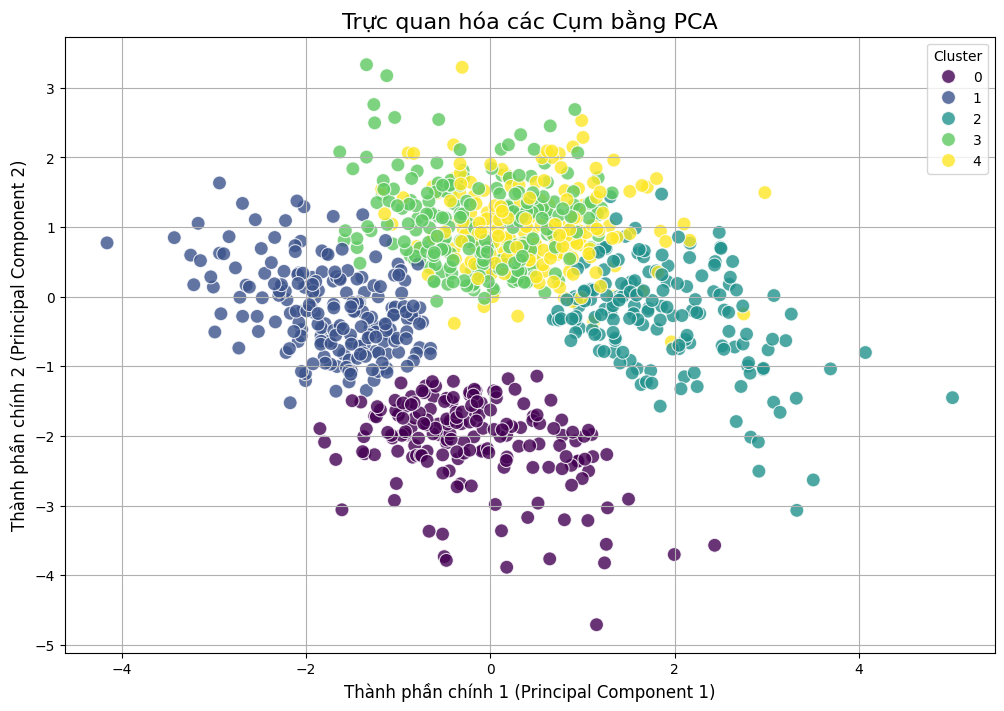

In [ ]:
from sklearn.decomposition import PCA
df_cluster_scale = scaler.fit_transform(df_cluster)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(df_cluster_scale)
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Trực quan hóa các Cụm bằng PCA', fontsize=16)
plt.xlabel('Thành phần chính 1 (Principal Component 1)', fontsize=12)
plt.ylabel('Thành phần chính 2 (Principal Component 2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)

In [ ]:
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,...,WaterUsage,EnergyConsumption,Revenue_log,MarketCap_log,CarbonEmissions_log,WaterUsage_log,EnergyConsumption_log,Cluster,PCA1,PCA2
9,1,Company_1,Retail,Latin America,2024,687.0,4.6,460.1,7.9,58.5,...,24644.5,98578.1,6.533789,6.133615,10.805479,10.112350,11.498615,3,-1.294093,0.946249
20,2,Company_2,Retail,Asia,2024,3822.9,-1.2,5807.8,3.6,65.7,...,141830.0,567320.0,8.249026,8.667129,12.555535,11.862391,13.248681,3,-0.460647,0.178570
31,3,Company_3,Transportation,Latin America,2024,438.0,10.3,739.4,5.5,32.1,...,45393.6,907872.8,6.084499,6.607191,12.514890,10.723148,13.718861,4,-0.589437,0.876778
42,4,Company_4,Technology,Africa,2024,6555.1,26.0,45451.6,12.2,63.5,...,98326.7,327755.8,8.788151,10.724425,12.006883,11.496061,12.700027,2,1.921258,0.217373
53,5,Company_5,Finance,Middle East,2024,3282.1,22.5,9663.0,0.0,47.4,...,20909.4,104546.9,8.096543,9.176163,10.641125,9.948002,11.557401,4,0.748891,2.054398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,996,Company_996,Healthcare,Europe,2024,5915.9,24.4,30318.1,8.9,60.1,...,343417.5,686834.9,8.685568,10.319533,12.746705,12.746705,13.439851,2,1.665484,0.083576
10965,997,Company_997,Utilities,Africa,2024,634.7,11.5,733.2,1.8,66.1,...,267487.0,4279792.1,6.454727,6.598781,12.966832,12.496830,15.269415,1,-0.835389,-0.133886
10976,998,Company_998,Healthcare,Oceania,2024,1838.2,30.5,13081.9,3.5,66.5,...,91910.8,183821.5,7.517086,9.479061,11.428585,11.428585,12.121726,2,1.366066,1.118476
10987,999,Company_999,Finance,Asia,2024,5464.8,21.5,9851.2,5.5,53.6,...,27988.7,139943.5,8.606266,9.195450,10.932721,10.239592,11.849001,3,0.787933,1.261826


In [ ]:
# Tính tỷ trọng ngành trong từng cluster
counts = df.groupby(["Cluster","Industry"]).size().reset_index(name="count")
pivot = counts.pivot(index="Cluster", columns="Industry", values="count").fillna(0)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Tạo bảng Template 1
rows = []
for cluster in pivot_pct.index:
    row = pivot_pct.loc[cluster]
    top3 = row.nlargest(3)
    rows.append({
        "Cluster": cluster,
        "Top1 Industry": top3.index[0],
        "Top1 %": round(top3.iloc[0], 2),
        "Top2 Industry": top3.index[1],
        "Top2 %": round(top3.iloc[1], 2),
        "Top3 Industry": top3.index[2],
        "Top3 %": round(top3.iloc[2], 2),
    })

template1_df = pd.DataFrame(rows)
template1_df

,Cluster,Top1 Industry,Top1 %,Top2 Industry,Top2 %,Top3 Industry,Top3 %
0,0,Energy,22.73,Transportation,20.45,Manufacturing,14.20
1,1,Transportation,24.27,Utilities,22.33,Retail,15.53
2,2,Technology,38.82,Healthcare,24.12,Energy,13.53
3,3,Finance,34.18,Retail,19.83,Healthcare,12.66
4,4,Consumer Goods,18.01,Manufacturing,17.06,Utilities,17.06


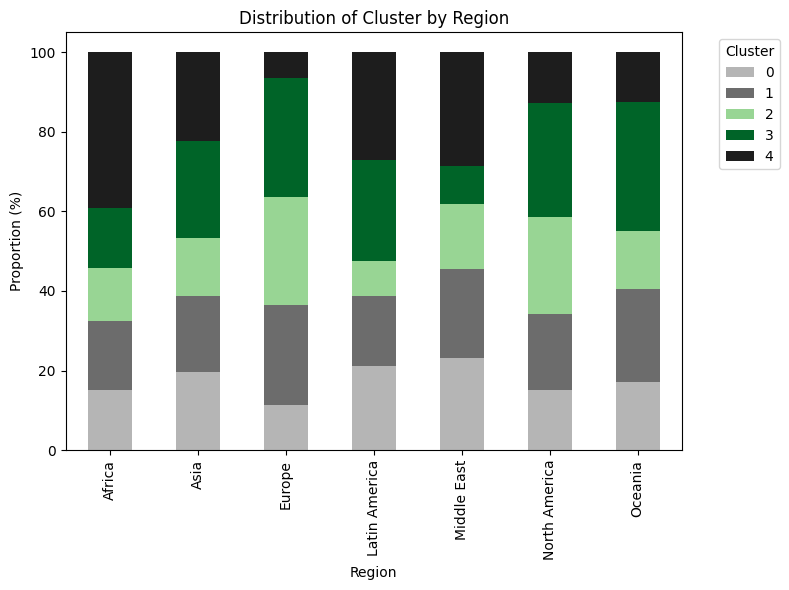

In [ ]:
# Distribution of Cluster by Region
# Đếm số lượng
counts = df.groupby(["Cluster","Region"]).size().reset_index(name="count")
pivot = counts.pivot(index="Region", columns="Cluster", values="count").fillna(0)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Xác định nhóm cluster
green_clusters = [2, 3]
gray_clusters = [0, 1, 4]

# Tạo colormap cho 2 nhóm
greens = cm.Greens(np.linspace(0.4, 0.9, len(green_clusters)))  # xanh lá đậm → nhạt
grays = cm.Greys(np.linspace(0.4, 0.9, len(gray_clusters)))     # xám đậm → nhạt

# Gán màu cho từng cluster
cluster_colors = {}
for c, col in zip(green_clusters, greens):
    cluster_colors[c] = col
for c, col in zip(gray_clusters, grays):
    cluster_colors[c] = col

# Lấy màu theo thứ tự cột trong pivot_pct
colors = [cluster_colors[c] for c in pivot_pct.columns]

# Vẽ stacked bar chart
pivot_pct.plot(kind="bar", stacked=True, figsize=(8,6), color=colors)

plt.ylabel("Proportion (%)")
plt.title("Distribution of Cluster by Region")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


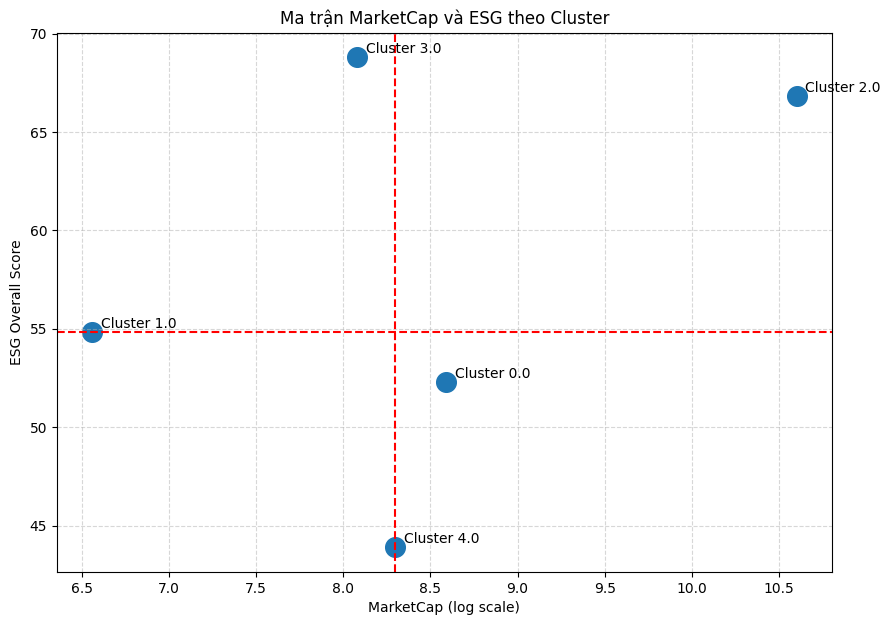

In [ ]:
# Tính trung vị cho mỗi Cluster
cluster_stats = df.groupby("Cluster")[["MarketCap_log", "ESG_Overall"]].median().reset_index()

# Vẽ scatter plot
plt.figure(figsize=(10,7))
plt.scatter(cluster_stats["MarketCap_log"], cluster_stats["ESG_Overall"], s=200)

# Gắn nhãn tên Cluster
for i, row in cluster_stats.iterrows():
    plt.text(row["MarketCap_log"]+0.05, row["ESG_Overall"]+0.2, f"Cluster {row['Cluster']}", fontsize=10)

# Vẽ đường chia trung vị
x_median = cluster_stats["MarketCap_log"].median()
y_median = cluster_stats["ESG_Overall"].median()
plt.axvline(x=x_median, color="red", linestyle="--")
plt.axhline(y=y_median, color="red", linestyle="--")

# Tiêu đề & nhãn trục
plt.xlabel("MarketCap (log scale)")
plt.ylabel("ESG Overall Score")
plt.title("Ma trận MarketCap và ESG theo Cluster")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

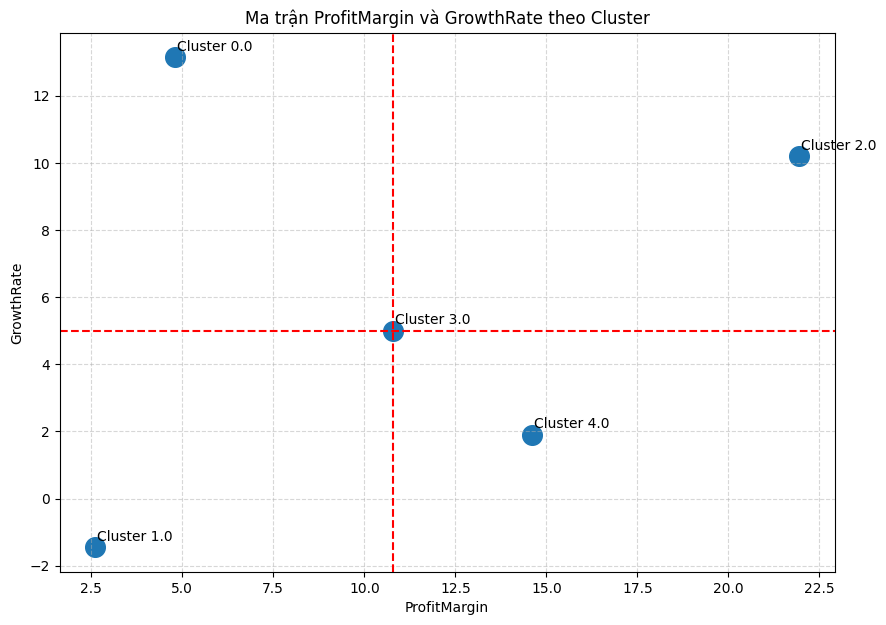

In [ ]:
# Tính trung vị cho mỗi Cluster
cluster_stats = df.groupby("Cluster")[["ProfitMargin", "GrowthRate"]].median().reset_index()

# Vẽ scatter plot
plt.figure(figsize=(10,7))
plt.scatter(cluster_stats["ProfitMargin"], cluster_stats["GrowthRate"], s=200)

# Gắn nhãn tên Cluster
for i, row in cluster_stats.iterrows():
    plt.text(row["ProfitMargin"]+0.05, row["GrowthRate"]+0.2, f"Cluster {row['Cluster']}", fontsize=10)

# Vẽ đường chia trung vị
x_median = cluster_stats["ProfitMargin"].median()
y_median = cluster_stats["GrowthRate"].median()
plt.axvline(x=x_median, color="red", linestyle="--")
plt.axhline(y=y_median, color="red", linestyle="--")

# Tiêu đề & nhãn trục
plt.xlabel("ProfitMargin")
plt.ylabel("GrowthRate")
plt.title("Ma trận ProfitMargin và GrowthRate theo Cluster")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()